In [2]:
import glob
import pandas as pd
import sklearn.preprocessing as PP
import sklearn.model_selection as MS
import sklearn.linear_model as LM
import sklearn.metrics as MT
import matplotlib.pyplot as plt
import sklearn.feature_selection as FS
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# Load data

In [24]:
import networkx as nx
import json
data = json.load(open('river_network.json', 'r'))
river_network = nx.node_link_graph(data)

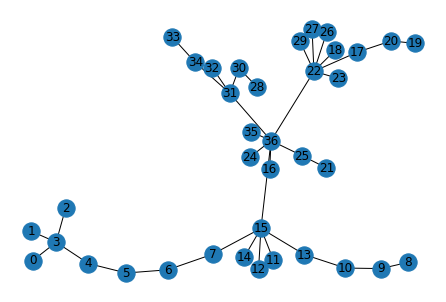

In [25]:
nx.draw(river_network, with_labels=True)

In [6]:
# data = {}

# for file in glob.glob('data/monitordata/dam_*.csv'):
#     name = 'dam_' + file[file.find('_') + 1: file.find('.')]
#     df = pd.read_csv(file)
#     df.Date = pd.to_datetime(df.Date)
#     df = df.set_index('Date').sort_index()
#     df = df.rename(columns = {'WaterArea': 'Data'})
#     data[name] = df

# ddams = pd.concat([df.Data for df in data.values()], axis = 1)
# ddams.columns = data.keys()
# ddams = ddams.fillna(method = 'backfill').dropna()

# for file in glob.glob('data/monitordata/rw_*.csv'):
#     name = 'rw_' + file[file.find('_') + 1: file.find('.')]
#     df = pd.read_csv(file)
#     df.Date = pd.to_datetime(df.Date)
#     df = df.set_index('Date').sort_index()
#     df = df.rename(columns = {'Daily runoff (mm)': 'Data'})
#     data[name] = df

# drw = pd.concat([value.Data for key, value in data.items() if key.startswith('rw')], axis = 1)
# drw.columns = [key for key in data if key.startswith('rw')]
# drw = drw.dropna()

# df = pd.concat([ddams, drw], axis = 1).dropna()
# df

In [26]:
# df.to_csv('data.csv')
df = pd.read_csv('data.csv', index_col = 'Date')

# Transform data using Standard Scaler

In [8]:
scaler = PP.StandardScaler().fit(df)
df_transformed = pd.DataFrame(data = scaler.transform(df), columns = df.columns)

# Survey data

In [9]:
def apply_regressor(X, Y, regressor, scorer = MS.cross_val_score):
    return scorer(regressor, X, Y, cv = 7, scoring = 'r2').mean()
def survey(df, outCol, inpCols, regressors, period = 15, future = 1):
    outCol = df[outCol].values.reshape(-1)
    inpCols = df[inpCols].values
    X, Y = [], []
    for i in range(len(df) - (period + future - 1)):
        X.append(inpCols[i:i + period,:].reshape(-1))
        Y.append(outCol[i + future + period - 1])
    res = {}
    for name, regressor in regressors:
        res[name] = [apply_regressor(X, Y, regressor)]
    return pd.DataFrame(data = res, index = ['Score mean'])

## Regressors

In [20]:
estimators = [
    ('lr', LM.Ridge(1)),
    ('svr', SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))
]
stacking = StackingRegressor(estimators=estimators, final_estimator=AdaBoostRegressor(n_estimators=50))

regressors = [('Ridge', LM.Ridge()),
              ('Linear', LM.LinearRegression()),
              ('Lasso', LM.Lasso(random_state=42)),
              ('Adaboost', AdaBoostRegressor(n_estimators=100, base_estimator=DecisionTreeRegressor(max_depth=4))),
              ('SVR', SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)),
              ('Stacking', stacking)
             ]

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
period = 15, future = 1
Node: dam_Haixihai, neighbors: ['dam_Xiaowan']


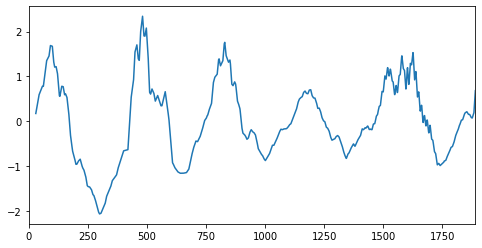

---------------------------------------------------------------



Node: dam_Zibihe, neighbors: ['dam_Xiaowan']


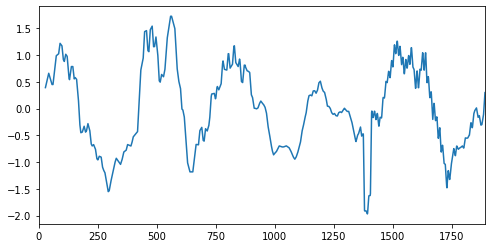

---------------------------------------------------------------



Node: dam_Gongguoqiao, neighbors: ['dam_Xiaowan']


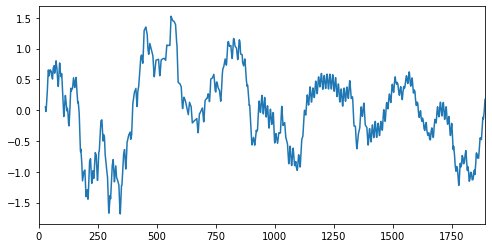

---------------------------------------------------------------



Node: dam_Xiaowan, neighbors: ['dam_Haixihai', 'dam_Zibihe', 'dam_Gongguoqiao', 'dam_Manwan']


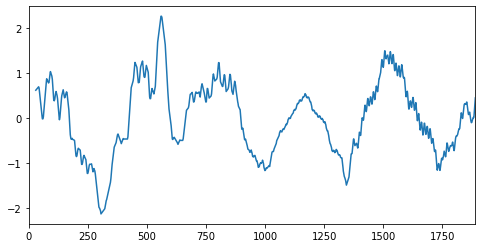

---------------------------------------------------------------



Node: dam_Manwan, neighbors: ['dam_Xiaowan', 'dam_Dachaoshan']


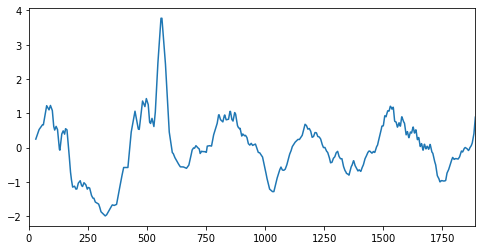

---------------------------------------------------------------



Node: dam_Dachaoshan, neighbors: ['dam_Manwan', 'dam_Nuozhadu']


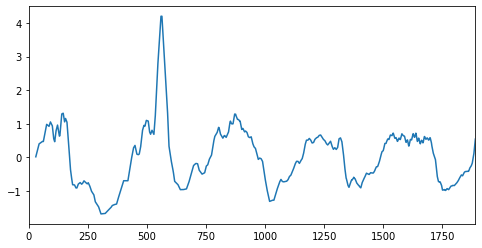

---------------------------------------------------------------



Node: dam_Nuozhadu, neighbors: ['dam_Dachaoshan', 'dam_Jinghong']


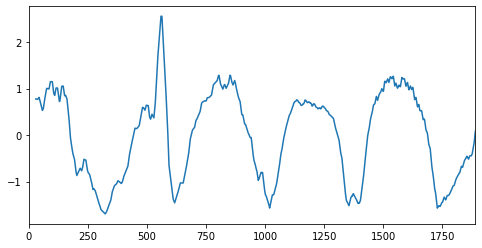

---------------------------------------------------------------



Node: dam_Jinghong, neighbors: ['dam_Nuozhadu', 'rw_239']


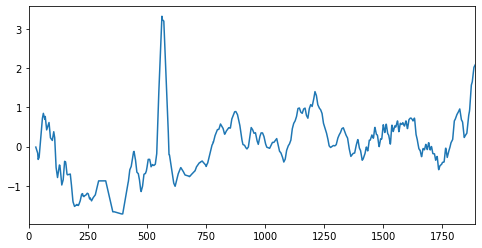

---------------------------------------------------------------



Node: dam_Nam Ngum 5, neighbors: ['dam_Nam Ngum 2']


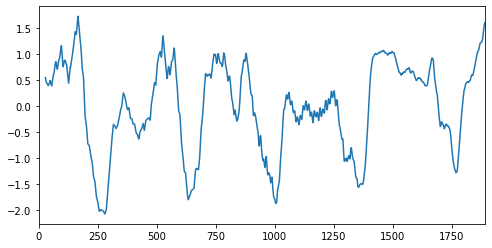

---------------------------------------------------------------



Node: dam_Nam Ngum 2, neighbors: ['dam_Nam Ngum 5', 'dam_Nam Ngum']


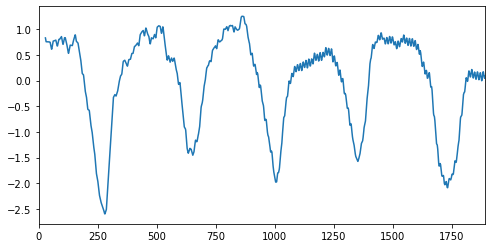

---------------------------------------------------------------



Node: dam_Nam Ngum, neighbors: ['dam_Nam Ngum 2', 'rw_242']


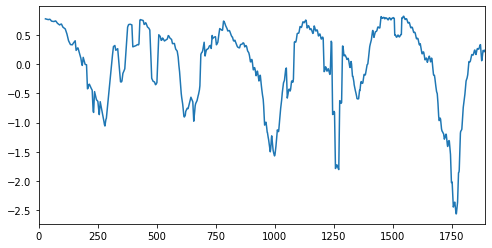

---------------------------------------------------------------



Node: dam_Nam Leuk, neighbors: ['rw_239']


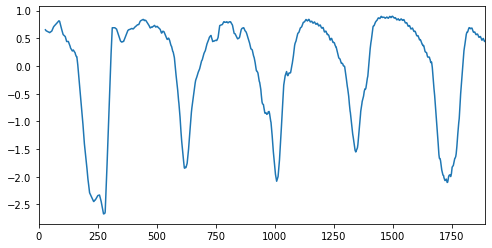

---------------------------------------------------------------



Node: dam_Nam Mang 3, neighbors: ['rw_239']


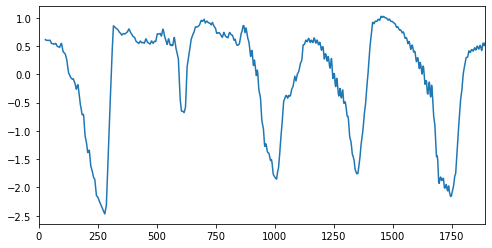

---------------------------------------------------------------



Node: rw_242, neighbors: ['dam_Nam Ngum', 'rw_239']


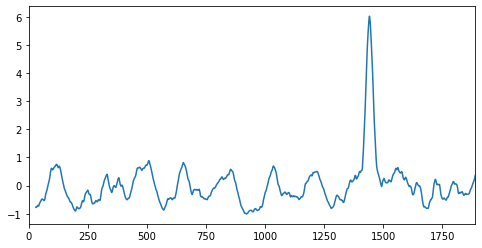

---------------------------------------------------------------



Node: dam_Nam Theun 2, neighbors: ['rw_239']


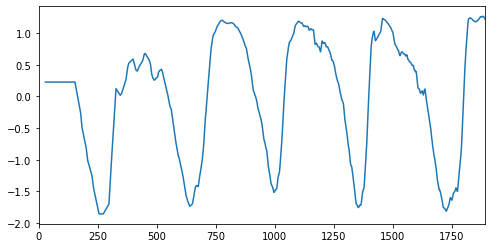

---------------------------------------------------------------



Node: rw_239, neighbors: ['dam_Jinghong', 'dam_Nam Leuk', 'dam_Nam Mang 3', 'rw_242', 'dam_Nam Theun 2', 'rw_34']


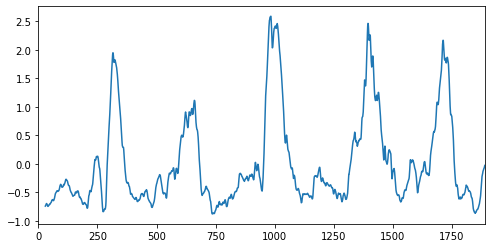

---------------------------------------------------------------



Node: dam_Nam Pung, neighbors: ['rw_34']


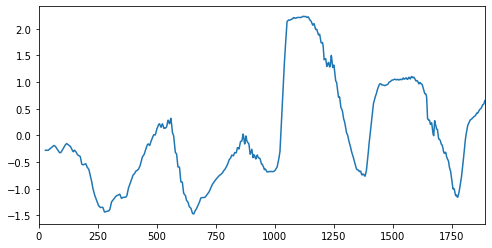

---------------------------------------------------------------



Node: dam_Ubol Ratana, neighbors: ['dam_Pak Mun', 'dam_Huai Kum']


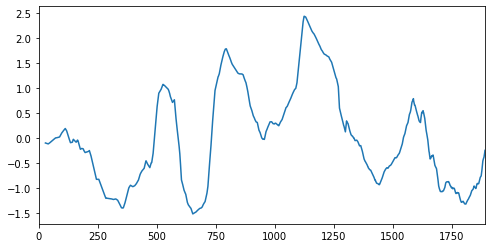

---------------------------------------------------------------



Node: dam_Lam Pao, neighbors: ['dam_Pak Mun']


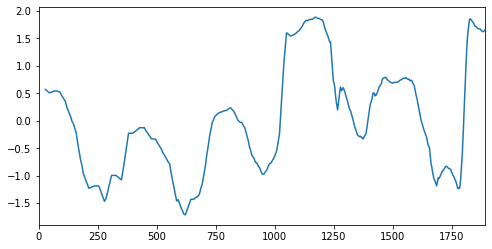

---------------------------------------------------------------



Node: dam_Chulabhorn, neighbors: ['dam_Huai Kum']


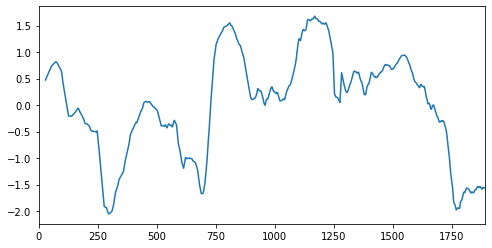

---------------------------------------------------------------



Node: dam_Huai Kum, neighbors: ['dam_Ubol Ratana', 'dam_Chulabhorn']


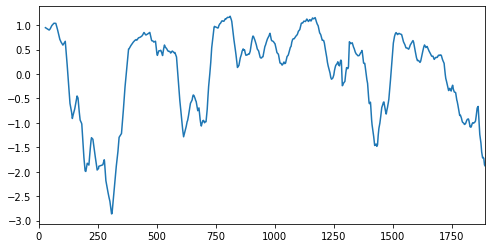

---------------------------------------------------------------



Node: dam_Xe Kaman 3, neighbors: ['dam_Xe Kaman 1']


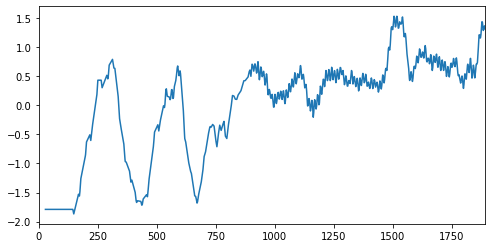

---------------------------------------------------------------



Node: dam_Pak Mun, neighbors: ['dam_Ubol Ratana', 'dam_Lam Pao', 'rw_34', 'dam_Sirindhorn', 'dam_Lamtakhong', 'dam_Lamphraphloeng', 'dam_Lamnangrong']


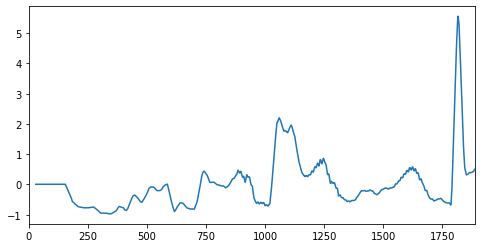

---------------------------------------------------------------



Node: dam_Sirindhorn, neighbors: ['dam_Pak Mun']


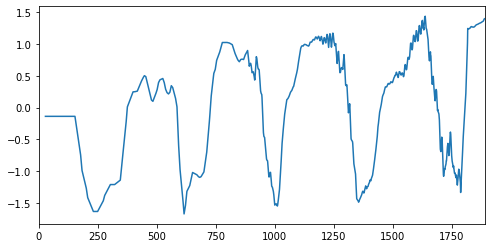

---------------------------------------------------------------



Node: dam_Houayho, neighbors: ['rw_34']


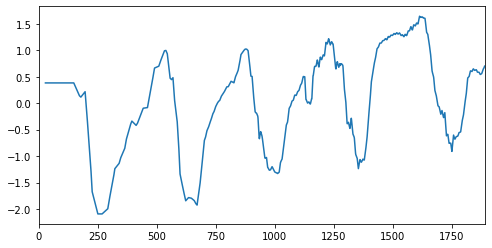

---------------------------------------------------------------



Node: dam_Xe Kaman 1, neighbors: ['dam_Xe Kaman 3', 'rw_34']


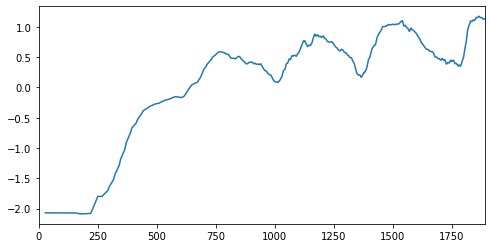

---------------------------------------------------------------



Node: dam_Lamtakhong, neighbors: ['dam_Pak Mun']


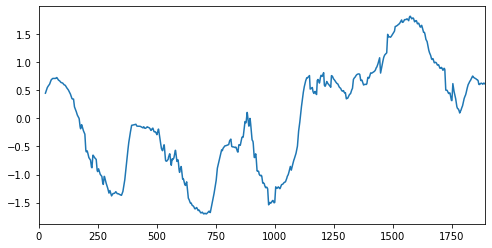

---------------------------------------------------------------



Node: dam_Lamphraphloeng, neighbors: ['dam_Pak Mun']


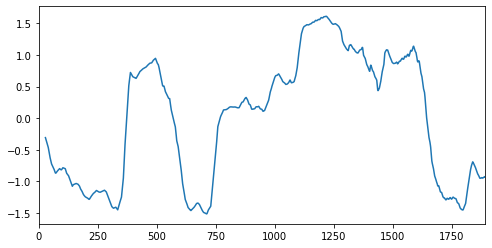

---------------------------------------------------------------



Node: dam_Plei Krong, neighbors: ['dam_Se San IV']


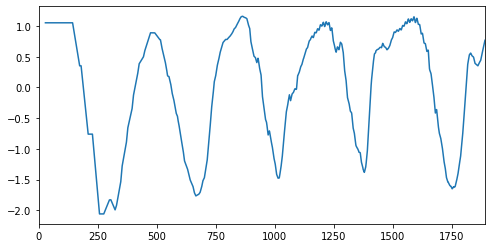

---------------------------------------------------------------



Node: dam_Lamnangrong, neighbors: ['dam_Pak Mun']


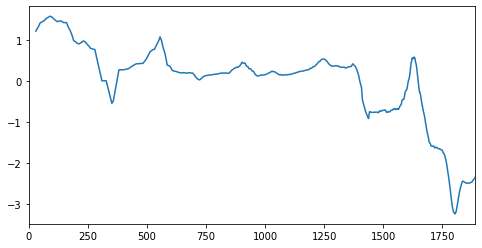

---------------------------------------------------------------



Node: dam_Se San IV, neighbors: ['dam_Plei Krong', 'dam_Lower Sesan II']


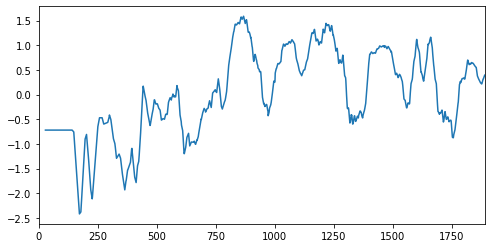

---------------------------------------------------------------



Node: dam_Lower Sesan II, neighbors: ['dam_Se San IV', 'rw_34', 'dam_Ea Soup Thuong', 'dam_Buon Kuop']


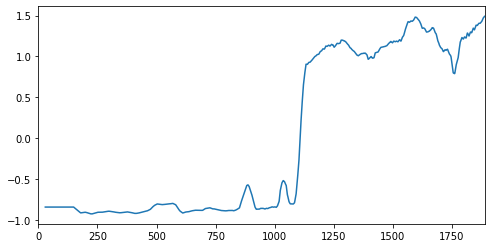

---------------------------------------------------------------



Node: dam_Ea Soup Thuong, neighbors: ['dam_Lower Sesan II']


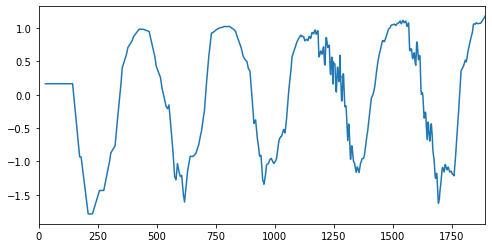

---------------------------------------------------------------



Node: dam_Krong Buk Ha, neighbors: ['dam_Buon Kuop']


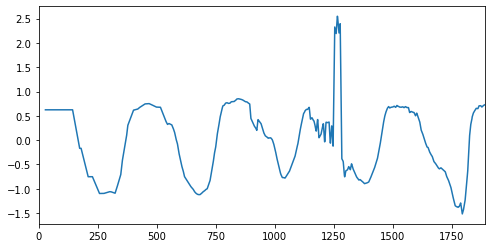

---------------------------------------------------------------



Node: dam_Buon Kuop, neighbors: ['dam_Lower Sesan II', 'dam_Krong Buk Ha']


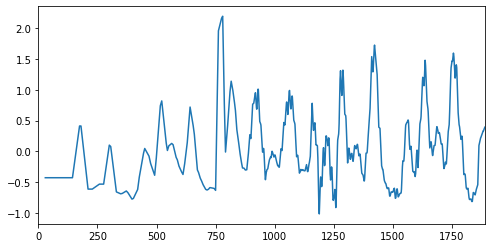

---------------------------------------------------------------



Node: rw_223, neighbors: ['rw_34']


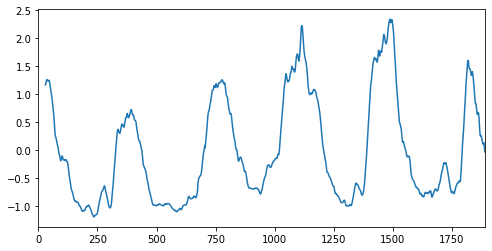

---------------------------------------------------------------



Node: rw_34, neighbors: ['rw_239', 'dam_Nam Pung', 'dam_Pak Mun', 'dam_Houayho', 'dam_Xe Kaman 1', 'dam_Lower Sesan II', 'rw_223']


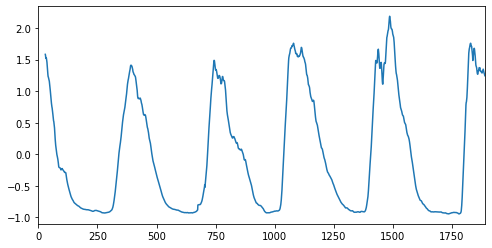

---------------------------------------------------------------



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
period = 15, future = 10
Node: dam_Haixihai, neighbors: ['dam_Xiaowan']


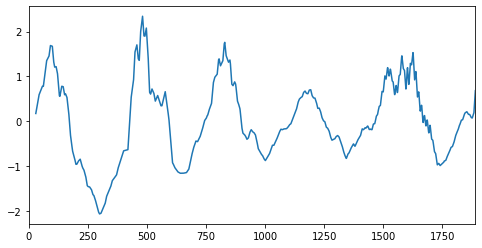

---------------------------------------------------------------



Node: dam_Zibihe, neighbors: ['dam_Xiaowan']


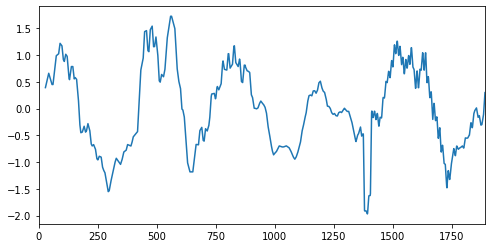

---------------------------------------------------------------



Node: dam_Gongguoqiao, neighbors: ['dam_Xiaowan']


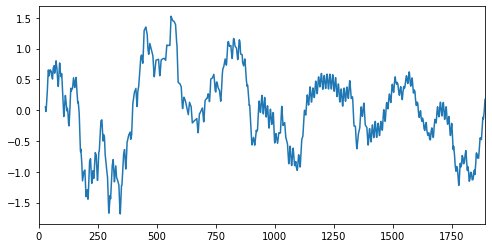

---------------------------------------------------------------



Node: dam_Xiaowan, neighbors: ['dam_Haixihai', 'dam_Zibihe', 'dam_Gongguoqiao', 'dam_Manwan']


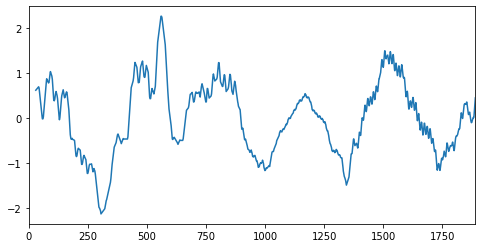

---------------------------------------------------------------



Node: dam_Manwan, neighbors: ['dam_Xiaowan', 'dam_Dachaoshan']


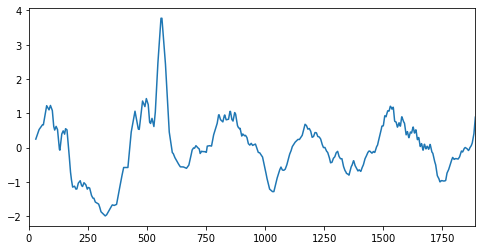

---------------------------------------------------------------



Node: dam_Dachaoshan, neighbors: ['dam_Manwan', 'dam_Nuozhadu']


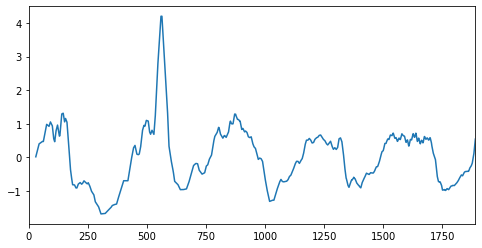

---------------------------------------------------------------



Node: dam_Nuozhadu, neighbors: ['dam_Dachaoshan', 'dam_Jinghong']


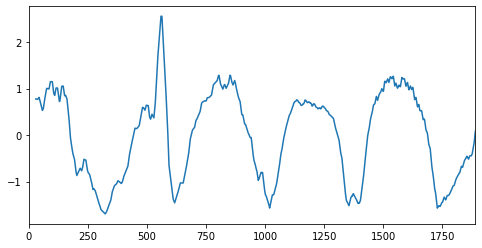

---------------------------------------------------------------



Node: dam_Jinghong, neighbors: ['dam_Nuozhadu', 'rw_239']


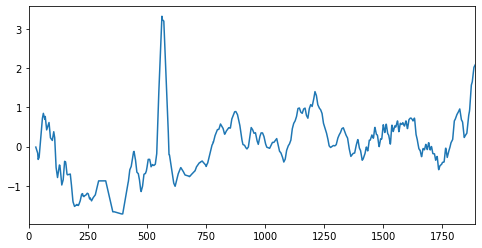

---------------------------------------------------------------



Node: dam_Nam Ngum 5, neighbors: ['dam_Nam Ngum 2']


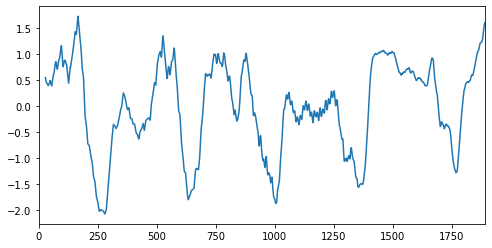

---------------------------------------------------------------



Node: dam_Nam Ngum 2, neighbors: ['dam_Nam Ngum 5', 'dam_Nam Ngum']


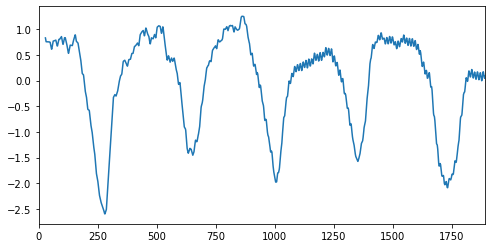

---------------------------------------------------------------



Node: dam_Nam Ngum, neighbors: ['dam_Nam Ngum 2', 'rw_242']


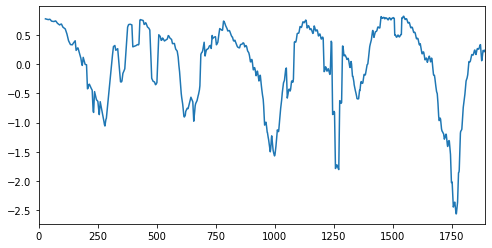

---------------------------------------------------------------



Node: dam_Nam Leuk, neighbors: ['rw_239']


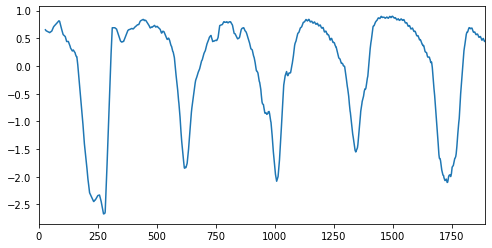

---------------------------------------------------------------



Node: dam_Nam Mang 3, neighbors: ['rw_239']


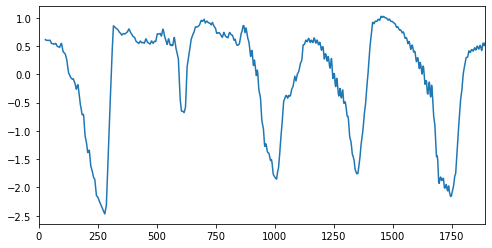

---------------------------------------------------------------



Node: rw_242, neighbors: ['dam_Nam Ngum', 'rw_239']


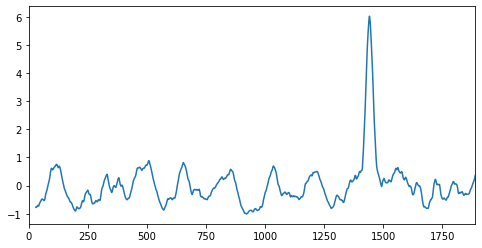

---------------------------------------------------------------



Node: dam_Nam Theun 2, neighbors: ['rw_239']


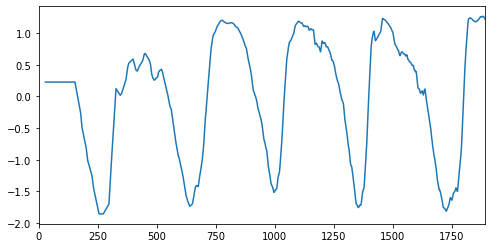

---------------------------------------------------------------



Node: rw_239, neighbors: ['dam_Jinghong', 'dam_Nam Leuk', 'dam_Nam Mang 3', 'rw_242', 'dam_Nam Theun 2', 'rw_34']


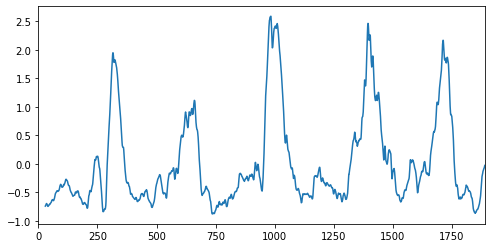

---------------------------------------------------------------



Node: dam_Nam Pung, neighbors: ['rw_34']


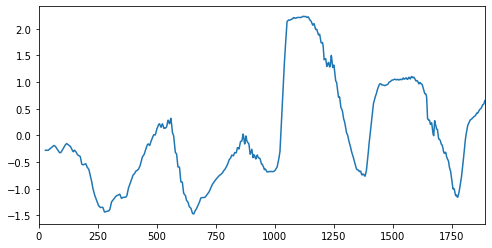

---------------------------------------------------------------



Node: dam_Ubol Ratana, neighbors: ['dam_Pak Mun', 'dam_Huai Kum']


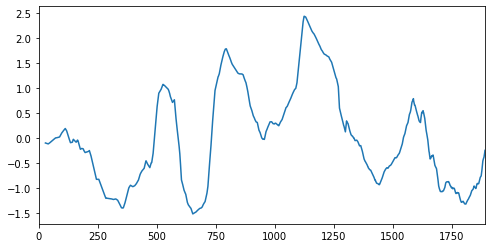

---------------------------------------------------------------



Node: dam_Lam Pao, neighbors: ['dam_Pak Mun']


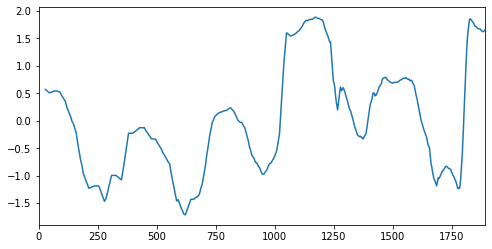

---------------------------------------------------------------



Node: dam_Chulabhorn, neighbors: ['dam_Huai Kum']


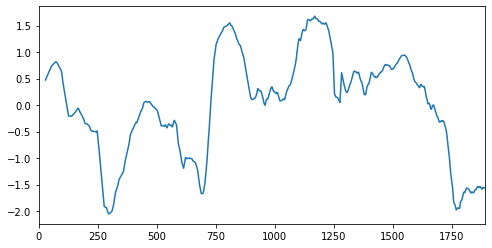

---------------------------------------------------------------



Node: dam_Huai Kum, neighbors: ['dam_Ubol Ratana', 'dam_Chulabhorn']


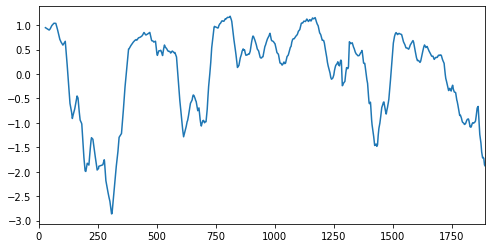

---------------------------------------------------------------



Node: dam_Xe Kaman 3, neighbors: ['dam_Xe Kaman 1']


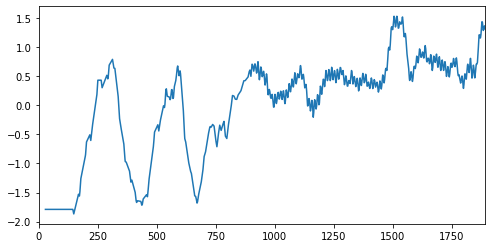

---------------------------------------------------------------



Node: dam_Pak Mun, neighbors: ['dam_Ubol Ratana', 'dam_Lam Pao', 'rw_34', 'dam_Sirindhorn', 'dam_Lamtakhong', 'dam_Lamphraphloeng', 'dam_Lamnangrong']


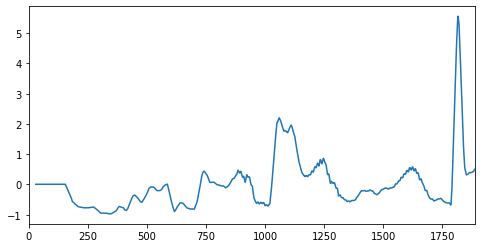

---------------------------------------------------------------



Node: dam_Sirindhorn, neighbors: ['dam_Pak Mun']


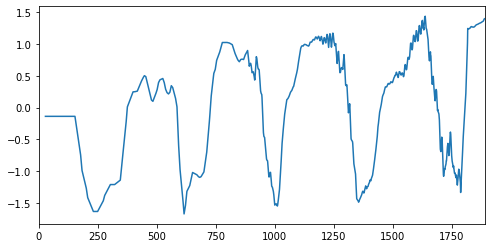

---------------------------------------------------------------



Node: dam_Houayho, neighbors: ['rw_34']


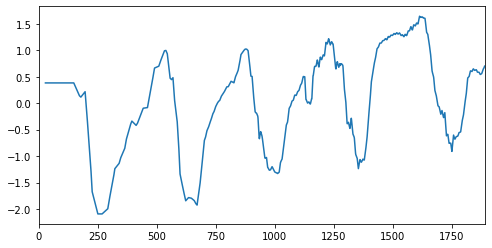

---------------------------------------------------------------



Node: dam_Xe Kaman 1, neighbors: ['dam_Xe Kaman 3', 'rw_34']


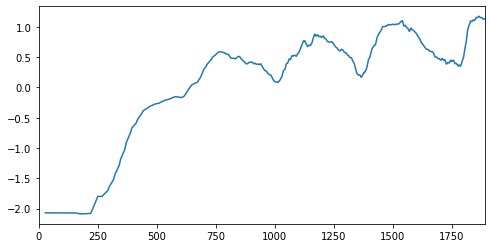

---------------------------------------------------------------



Node: dam_Lamtakhong, neighbors: ['dam_Pak Mun']


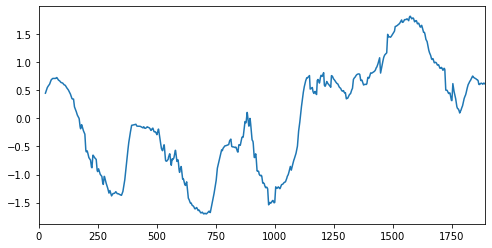

---------------------------------------------------------------



Node: dam_Lamphraphloeng, neighbors: ['dam_Pak Mun']


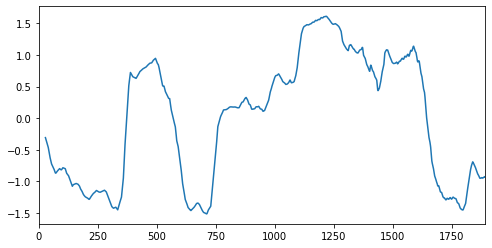

---------------------------------------------------------------



Node: dam_Plei Krong, neighbors: ['dam_Se San IV']


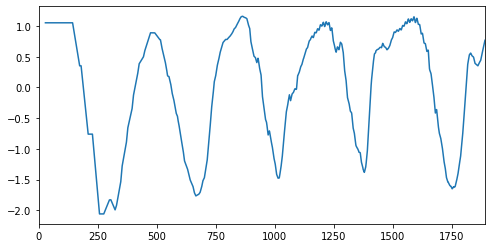

---------------------------------------------------------------



Node: dam_Lamnangrong, neighbors: ['dam_Pak Mun']


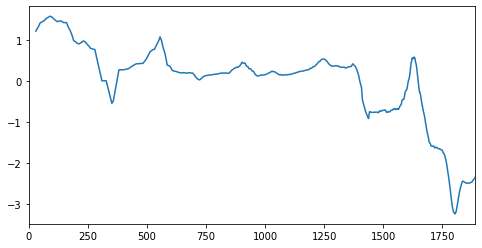

---------------------------------------------------------------



Node: dam_Se San IV, neighbors: ['dam_Plei Krong', 'dam_Lower Sesan II']


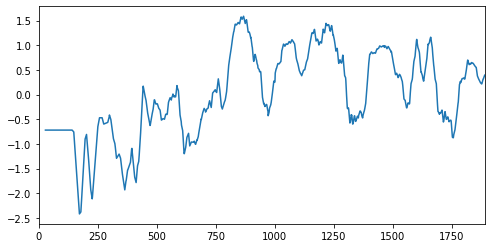

---------------------------------------------------------------



Node: dam_Lower Sesan II, neighbors: ['dam_Se San IV', 'rw_34', 'dam_Ea Soup Thuong', 'dam_Buon Kuop']


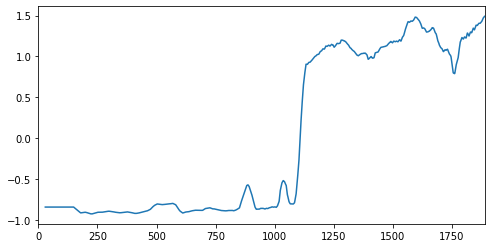

---------------------------------------------------------------



Node: dam_Ea Soup Thuong, neighbors: ['dam_Lower Sesan II']


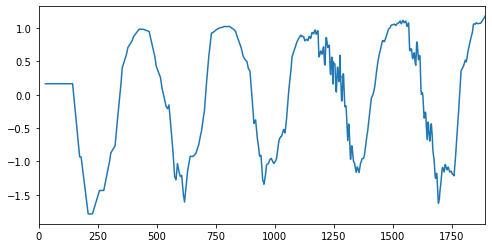

---------------------------------------------------------------



Node: dam_Krong Buk Ha, neighbors: ['dam_Buon Kuop']


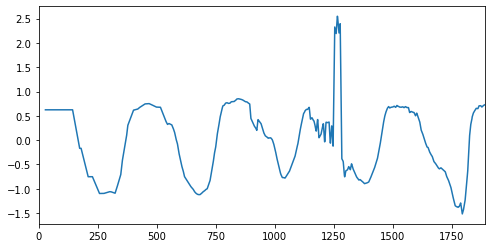

---------------------------------------------------------------



Node: dam_Buon Kuop, neighbors: ['dam_Lower Sesan II', 'dam_Krong Buk Ha']


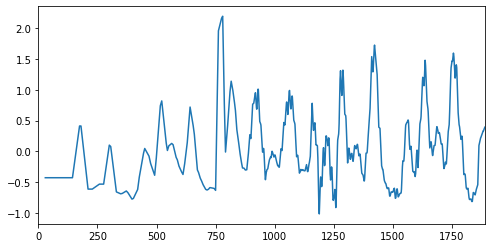

---------------------------------------------------------------



Node: rw_223, neighbors: ['rw_34']


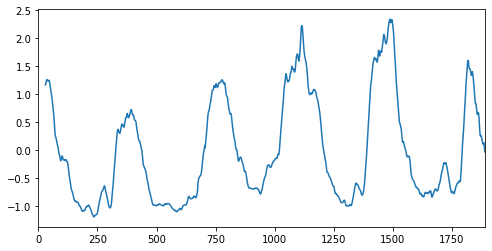

---------------------------------------------------------------



Node: rw_34, neighbors: ['rw_239', 'dam_Nam Pung', 'dam_Pak Mun', 'dam_Houayho', 'dam_Xe Kaman 1', 'dam_Lower Sesan II', 'rw_223']


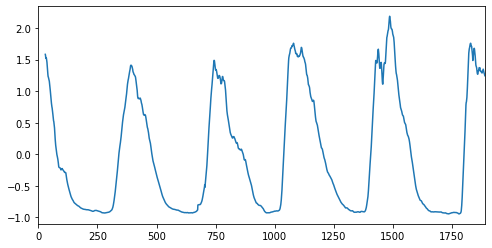

---------------------------------------------------------------



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
period = 15, future = 30
Node: dam_Haixihai, neighbors: ['dam_Xiaowan']


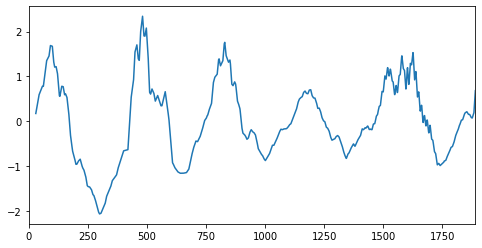

---------------------------------------------------------------



Node: dam_Zibihe, neighbors: ['dam_Xiaowan']


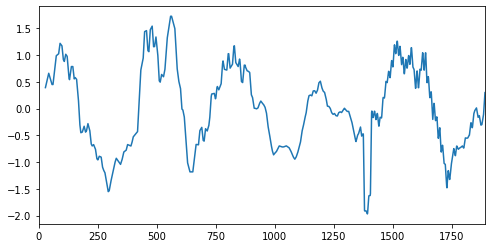

---------------------------------------------------------------



Node: dam_Gongguoqiao, neighbors: ['dam_Xiaowan']


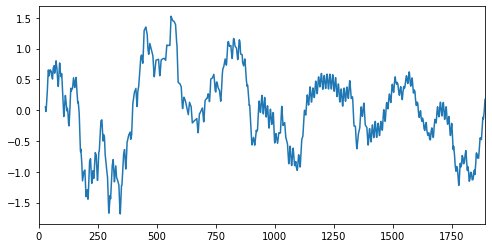

---------------------------------------------------------------



Node: dam_Xiaowan, neighbors: ['dam_Haixihai', 'dam_Zibihe', 'dam_Gongguoqiao', 'dam_Manwan']


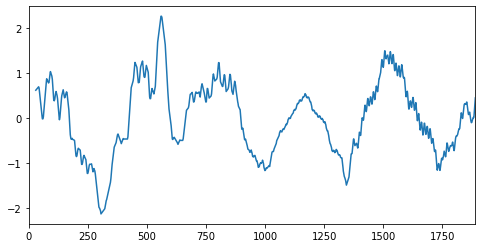

---------------------------------------------------------------



Node: dam_Manwan, neighbors: ['dam_Xiaowan', 'dam_Dachaoshan']


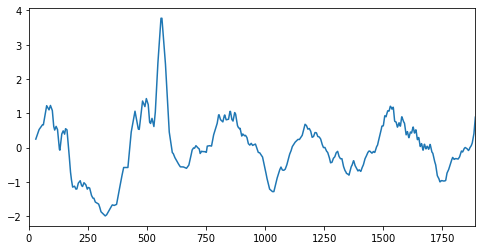

---------------------------------------------------------------



Node: dam_Dachaoshan, neighbors: ['dam_Manwan', 'dam_Nuozhadu']


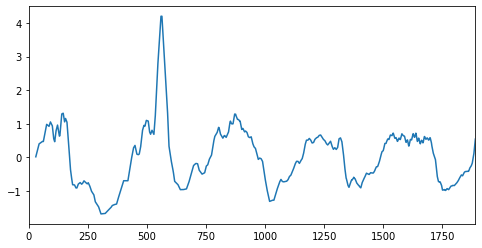

---------------------------------------------------------------



Node: dam_Nuozhadu, neighbors: ['dam_Dachaoshan', 'dam_Jinghong']


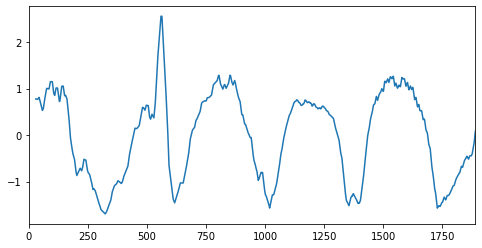

---------------------------------------------------------------



Node: dam_Jinghong, neighbors: ['dam_Nuozhadu', 'rw_239']


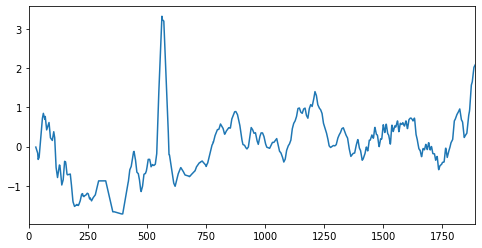

---------------------------------------------------------------



Node: dam_Nam Ngum 5, neighbors: ['dam_Nam Ngum 2']


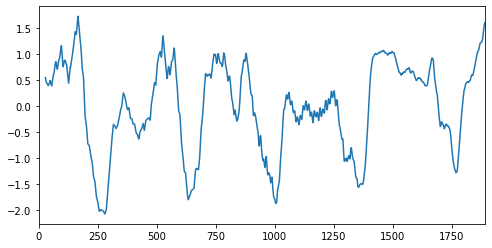

---------------------------------------------------------------



Node: dam_Nam Ngum 2, neighbors: ['dam_Nam Ngum 5', 'dam_Nam Ngum']


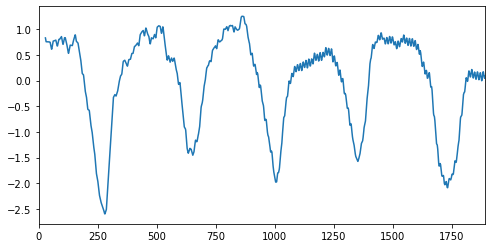

---------------------------------------------------------------



Node: dam_Nam Ngum, neighbors: ['dam_Nam Ngum 2', 'rw_242']


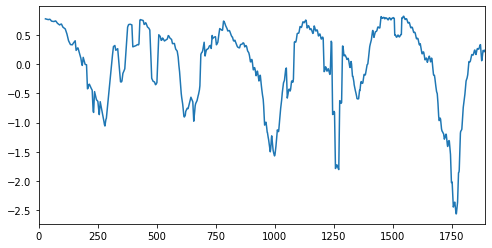

---------------------------------------------------------------



Node: dam_Nam Leuk, neighbors: ['rw_239']


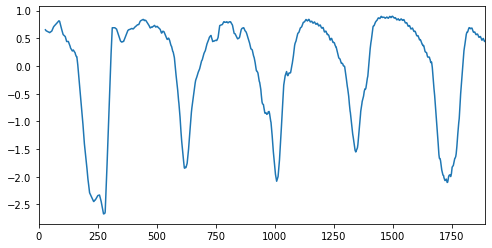

---------------------------------------------------------------



Node: dam_Nam Mang 3, neighbors: ['rw_239']


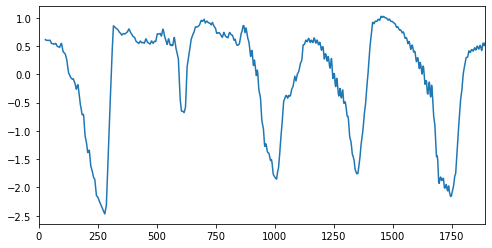

---------------------------------------------------------------



Node: rw_242, neighbors: ['dam_Nam Ngum', 'rw_239']


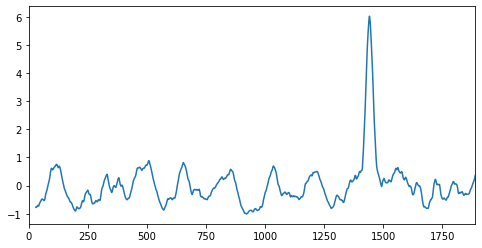

---------------------------------------------------------------



Node: dam_Nam Theun 2, neighbors: ['rw_239']


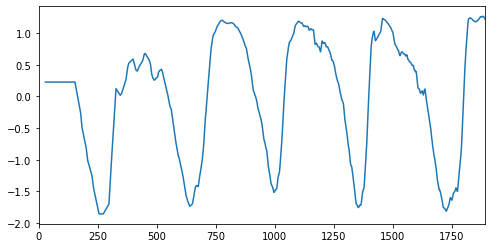

---------------------------------------------------------------



Node: rw_239, neighbors: ['dam_Jinghong', 'dam_Nam Leuk', 'dam_Nam Mang 3', 'rw_242', 'dam_Nam Theun 2', 'rw_34']


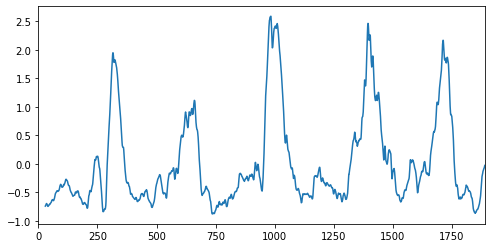

---------------------------------------------------------------



Node: dam_Nam Pung, neighbors: ['rw_34']


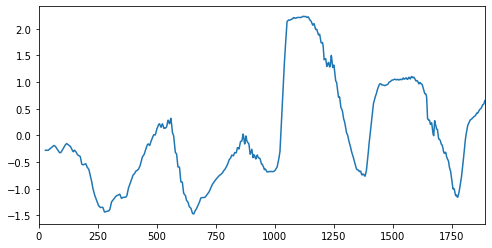

---------------------------------------------------------------



Node: dam_Ubol Ratana, neighbors: ['dam_Pak Mun', 'dam_Huai Kum']


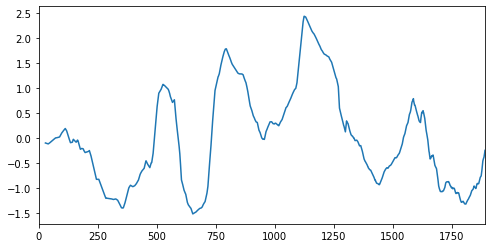

---------------------------------------------------------------



Node: dam_Lam Pao, neighbors: ['dam_Pak Mun']


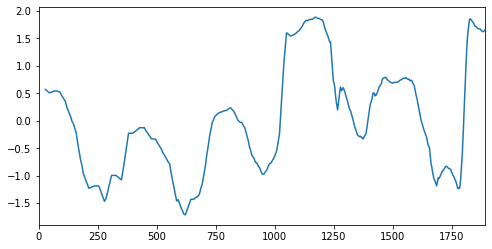

---------------------------------------------------------------



Node: dam_Chulabhorn, neighbors: ['dam_Huai Kum']


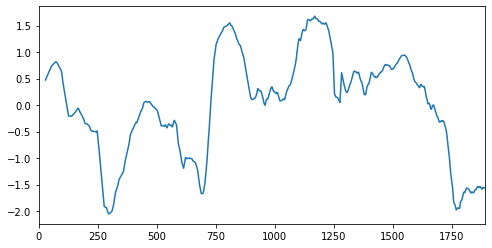

---------------------------------------------------------------



Node: dam_Huai Kum, neighbors: ['dam_Ubol Ratana', 'dam_Chulabhorn']


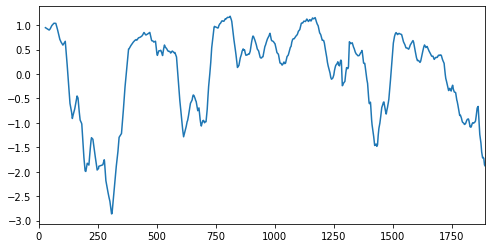

---------------------------------------------------------------



Node: dam_Xe Kaman 3, neighbors: ['dam_Xe Kaman 1']


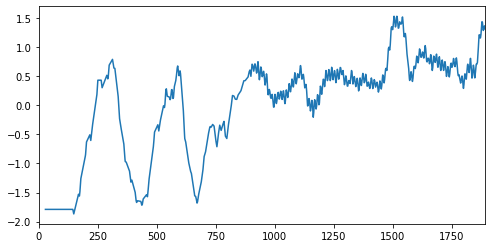

---------------------------------------------------------------



Node: dam_Pak Mun, neighbors: ['dam_Ubol Ratana', 'dam_Lam Pao', 'rw_34', 'dam_Sirindhorn', 'dam_Lamtakhong', 'dam_Lamphraphloeng', 'dam_Lamnangrong']


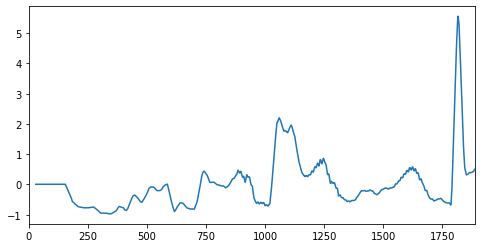

---------------------------------------------------------------



Node: dam_Sirindhorn, neighbors: ['dam_Pak Mun']


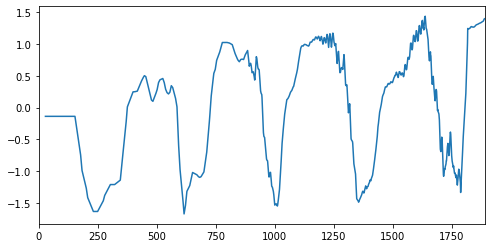

---------------------------------------------------------------



Node: dam_Houayho, neighbors: ['rw_34']


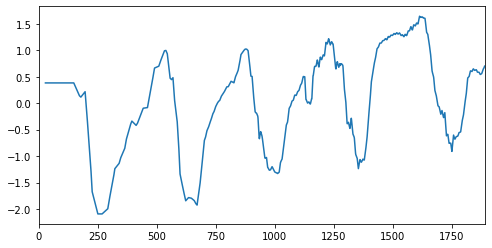

---------------------------------------------------------------



Node: dam_Xe Kaman 1, neighbors: ['dam_Xe Kaman 3', 'rw_34']


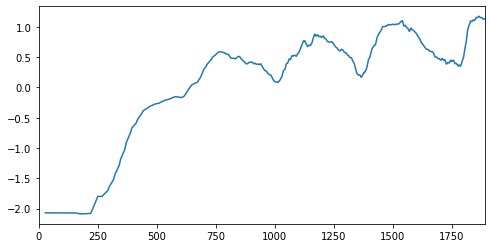

---------------------------------------------------------------



Node: dam_Lamtakhong, neighbors: ['dam_Pak Mun']


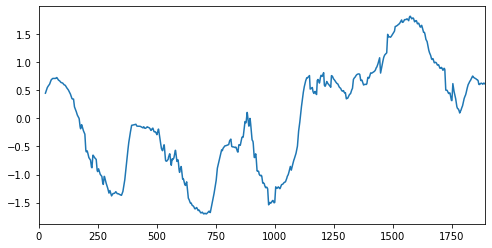

---------------------------------------------------------------



Node: dam_Lamphraphloeng, neighbors: ['dam_Pak Mun']


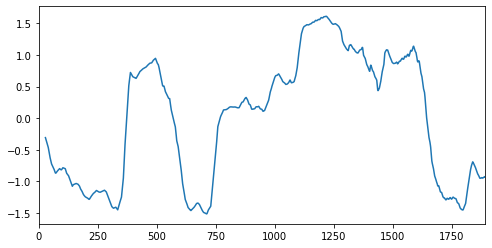

---------------------------------------------------------------



Node: dam_Plei Krong, neighbors: ['dam_Se San IV']


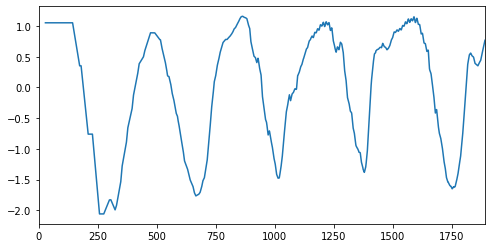

---------------------------------------------------------------



Node: dam_Lamnangrong, neighbors: ['dam_Pak Mun']


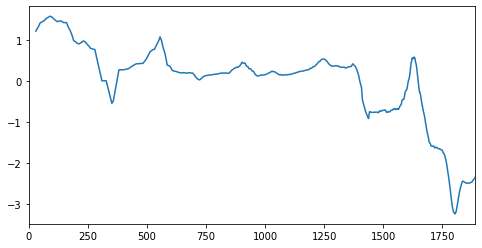

---------------------------------------------------------------



Node: dam_Se San IV, neighbors: ['dam_Plei Krong', 'dam_Lower Sesan II']


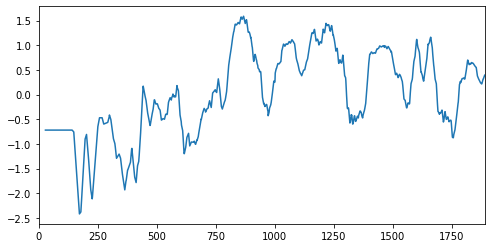

---------------------------------------------------------------



Node: dam_Lower Sesan II, neighbors: ['dam_Se San IV', 'rw_34', 'dam_Ea Soup Thuong', 'dam_Buon Kuop']


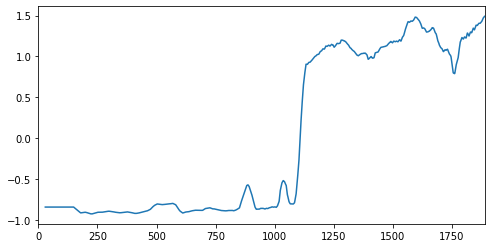

---------------------------------------------------------------



Node: dam_Ea Soup Thuong, neighbors: ['dam_Lower Sesan II']


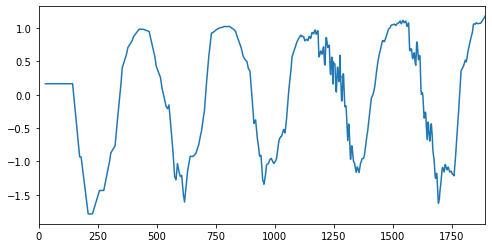

---------------------------------------------------------------



Node: dam_Krong Buk Ha, neighbors: ['dam_Buon Kuop']


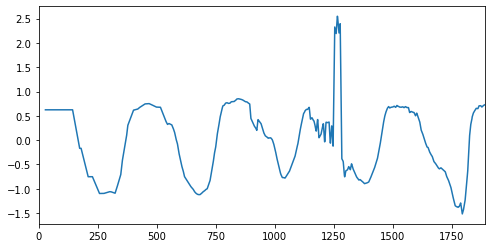

---------------------------------------------------------------



Node: dam_Buon Kuop, neighbors: ['dam_Lower Sesan II', 'dam_Krong Buk Ha']


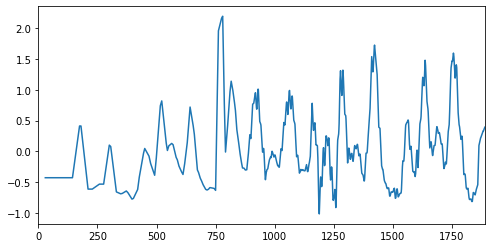

---------------------------------------------------------------



Node: rw_223, neighbors: ['rw_34']


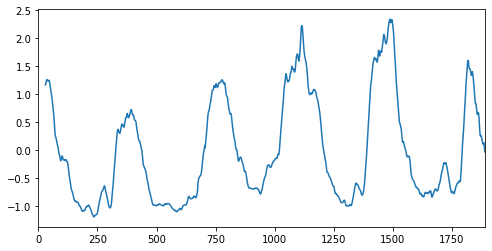

---------------------------------------------------------------



Node: rw_34, neighbors: ['rw_239', 'dam_Nam Pung', 'dam_Pak Mun', 'dam_Houayho', 'dam_Xe Kaman 1', 'dam_Lower Sesan II', 'rw_223']


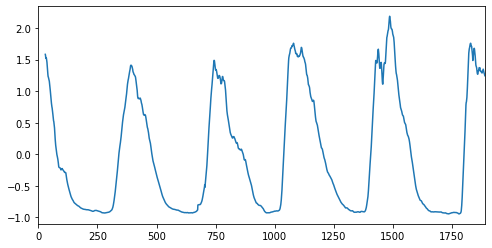

---------------------------------------------------------------



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
period = 30, future = 1
Node: dam_Haixihai, neighbors: ['dam_Xiaowan']


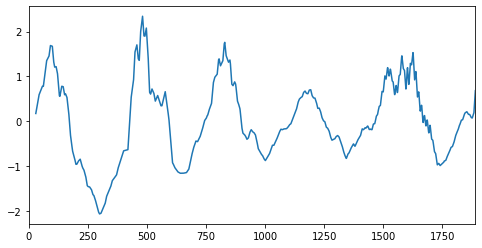

---------------------------------------------------------------



Node: dam_Zibihe, neighbors: ['dam_Xiaowan']


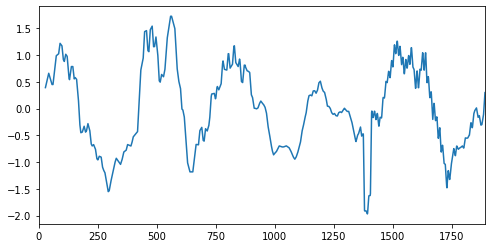

---------------------------------------------------------------



Node: dam_Gongguoqiao, neighbors: ['dam_Xiaowan']


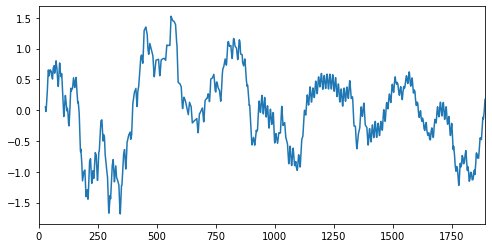

---------------------------------------------------------------



Node: dam_Xiaowan, neighbors: ['dam_Haixihai', 'dam_Zibihe', 'dam_Gongguoqiao', 'dam_Manwan']


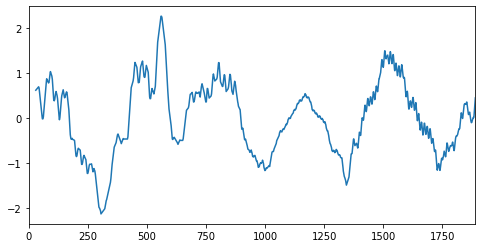

---------------------------------------------------------------



Node: dam_Manwan, neighbors: ['dam_Xiaowan', 'dam_Dachaoshan']


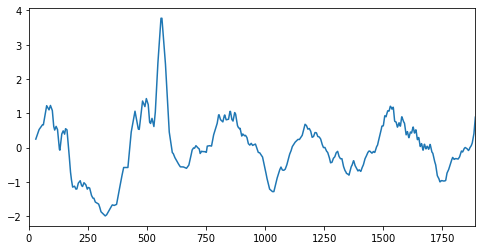

---------------------------------------------------------------



Node: dam_Dachaoshan, neighbors: ['dam_Manwan', 'dam_Nuozhadu']


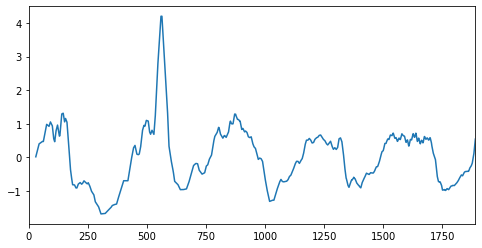

---------------------------------------------------------------



Node: dam_Nuozhadu, neighbors: ['dam_Dachaoshan', 'dam_Jinghong']


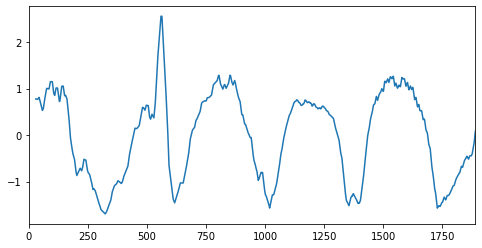

---------------------------------------------------------------



Node: dam_Jinghong, neighbors: ['dam_Nuozhadu', 'rw_239']


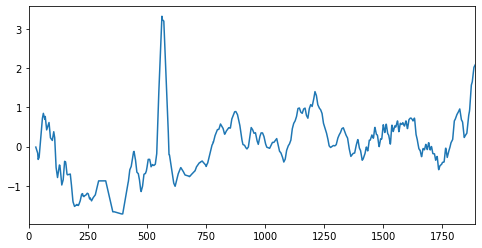

---------------------------------------------------------------



Node: dam_Nam Ngum 5, neighbors: ['dam_Nam Ngum 2']


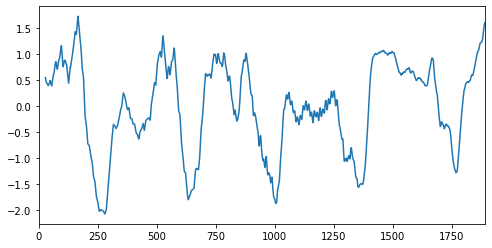

---------------------------------------------------------------



Node: dam_Nam Ngum 2, neighbors: ['dam_Nam Ngum 5', 'dam_Nam Ngum']


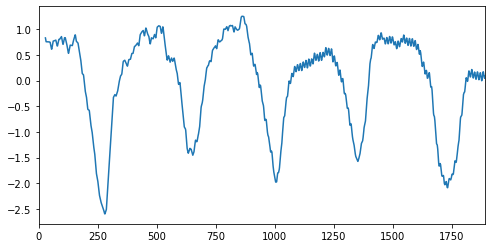

---------------------------------------------------------------



Node: dam_Nam Ngum, neighbors: ['dam_Nam Ngum 2', 'rw_242']


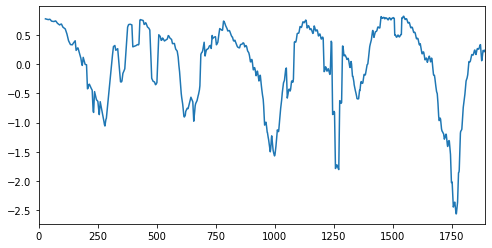

---------------------------------------------------------------



Node: dam_Nam Leuk, neighbors: ['rw_239']


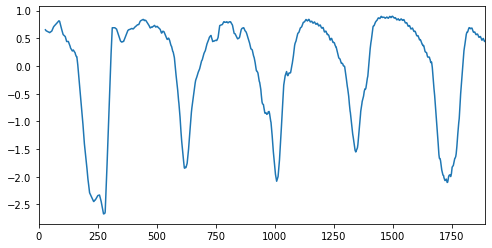

---------------------------------------------------------------



Node: dam_Nam Mang 3, neighbors: ['rw_239']


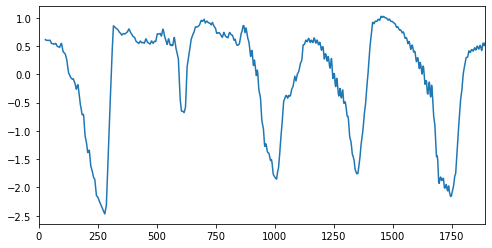

---------------------------------------------------------------



Node: rw_242, neighbors: ['dam_Nam Ngum', 'rw_239']


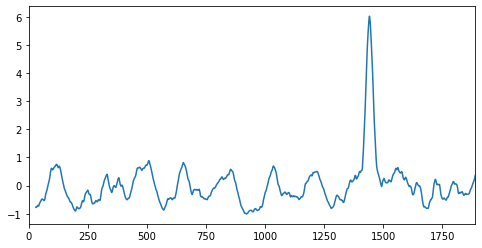

---------------------------------------------------------------



Node: dam_Nam Theun 2, neighbors: ['rw_239']


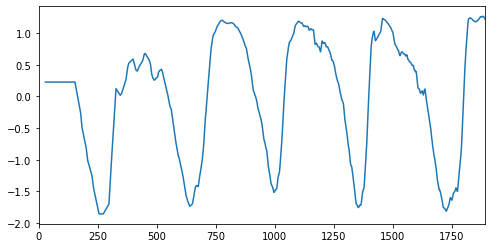

---------------------------------------------------------------



Node: rw_239, neighbors: ['dam_Jinghong', 'dam_Nam Leuk', 'dam_Nam Mang 3', 'rw_242', 'dam_Nam Theun 2', 'rw_34']


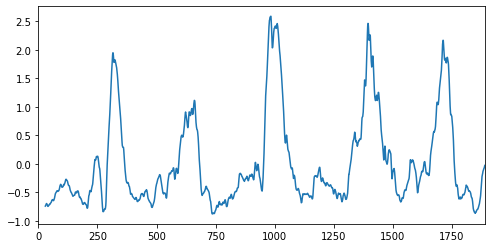

---------------------------------------------------------------



Node: dam_Nam Pung, neighbors: ['rw_34']


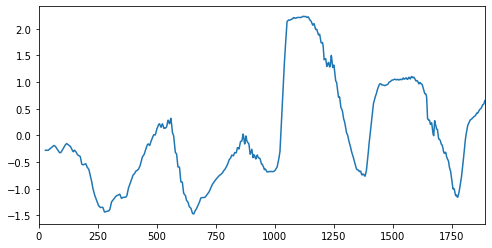

---------------------------------------------------------------



Node: dam_Ubol Ratana, neighbors: ['dam_Pak Mun', 'dam_Huai Kum']


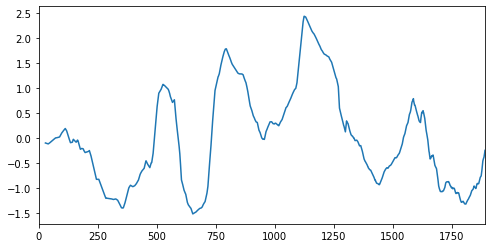

---------------------------------------------------------------



Node: dam_Lam Pao, neighbors: ['dam_Pak Mun']


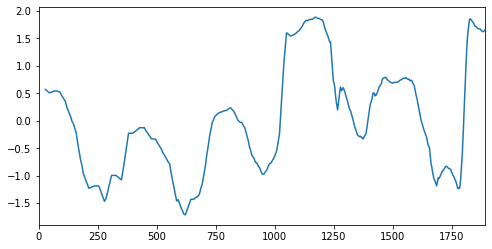

---------------------------------------------------------------



Node: dam_Chulabhorn, neighbors: ['dam_Huai Kum']


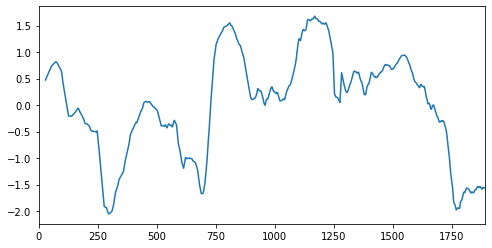

---------------------------------------------------------------



Node: dam_Huai Kum, neighbors: ['dam_Ubol Ratana', 'dam_Chulabhorn']


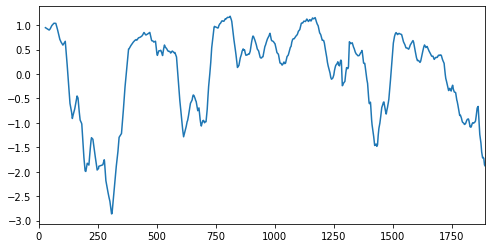

---------------------------------------------------------------



Node: dam_Xe Kaman 3, neighbors: ['dam_Xe Kaman 1']


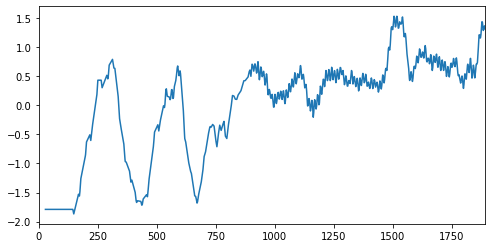

---------------------------------------------------------------



Node: dam_Pak Mun, neighbors: ['dam_Ubol Ratana', 'dam_Lam Pao', 'rw_34', 'dam_Sirindhorn', 'dam_Lamtakhong', 'dam_Lamphraphloeng', 'dam_Lamnangrong']


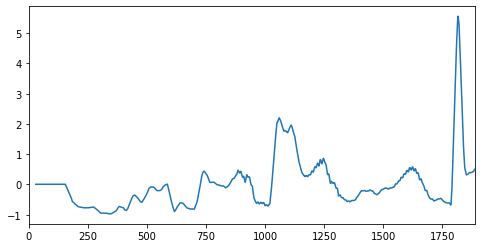

---------------------------------------------------------------



Node: dam_Sirindhorn, neighbors: ['dam_Pak Mun']


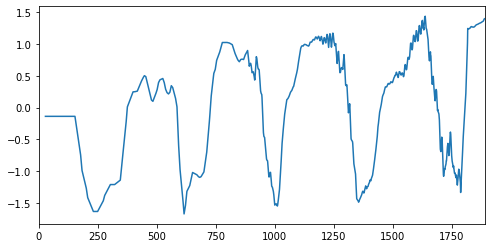

---------------------------------------------------------------



Node: dam_Houayho, neighbors: ['rw_34']


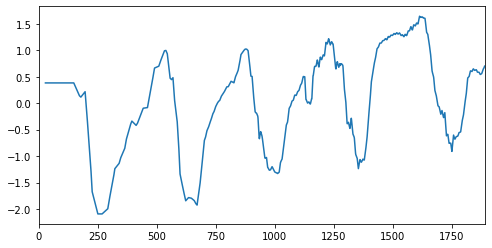

---------------------------------------------------------------



Node: dam_Xe Kaman 1, neighbors: ['dam_Xe Kaman 3', 'rw_34']


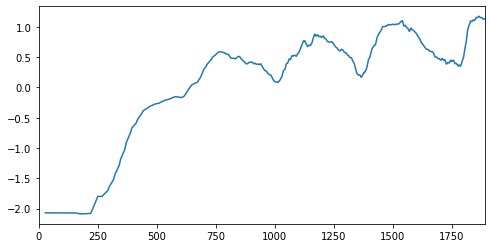

---------------------------------------------------------------



Node: dam_Lamtakhong, neighbors: ['dam_Pak Mun']


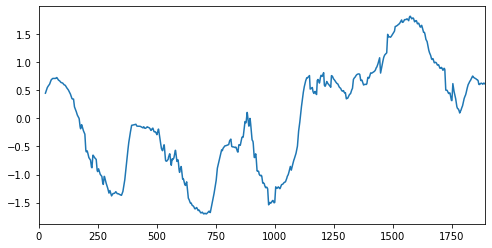

---------------------------------------------------------------



Node: dam_Lamphraphloeng, neighbors: ['dam_Pak Mun']


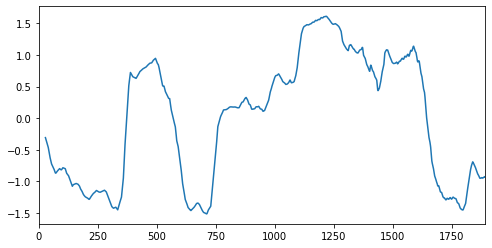

---------------------------------------------------------------



Node: dam_Plei Krong, neighbors: ['dam_Se San IV']


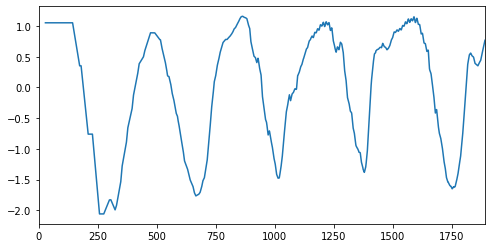

---------------------------------------------------------------



Node: dam_Lamnangrong, neighbors: ['dam_Pak Mun']


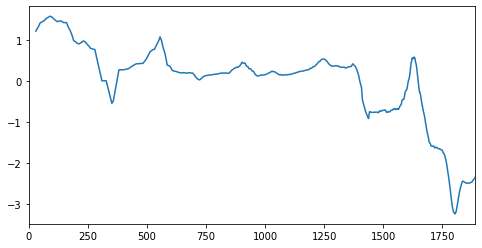

---------------------------------------------------------------



Node: dam_Se San IV, neighbors: ['dam_Plei Krong', 'dam_Lower Sesan II']


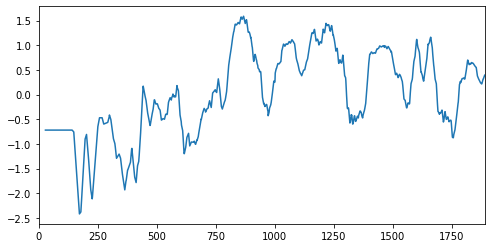

---------------------------------------------------------------



Node: dam_Lower Sesan II, neighbors: ['dam_Se San IV', 'rw_34', 'dam_Ea Soup Thuong', 'dam_Buon Kuop']


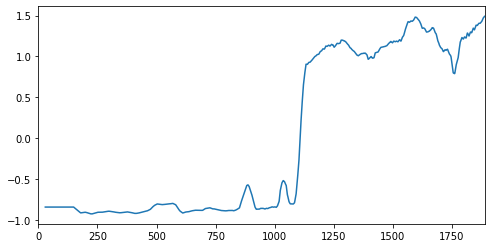

---------------------------------------------------------------



Node: dam_Ea Soup Thuong, neighbors: ['dam_Lower Sesan II']


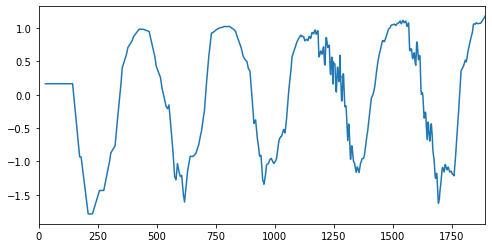

---------------------------------------------------------------



Node: dam_Krong Buk Ha, neighbors: ['dam_Buon Kuop']


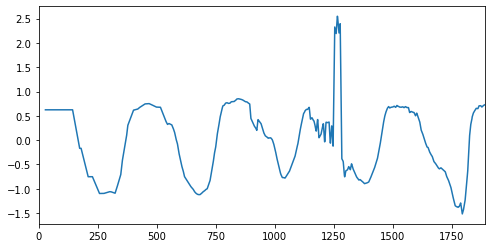

---------------------------------------------------------------



Node: dam_Buon Kuop, neighbors: ['dam_Lower Sesan II', 'dam_Krong Buk Ha']


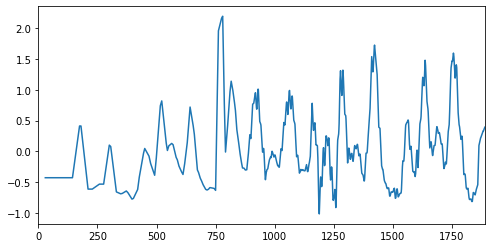

---------------------------------------------------------------



Node: rw_223, neighbors: ['rw_34']


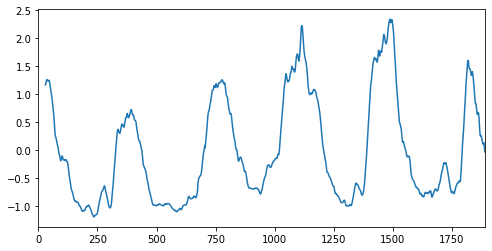

---------------------------------------------------------------



Node: rw_34, neighbors: ['rw_239', 'dam_Nam Pung', 'dam_Pak Mun', 'dam_Houayho', 'dam_Xe Kaman 1', 'dam_Lower Sesan II', 'rw_223']


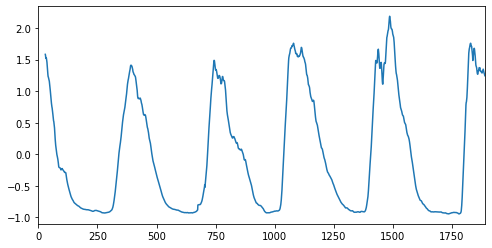

---------------------------------------------------------------



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
period = 30, future = 10
Node: dam_Haixihai, neighbors: ['dam_Xiaowan']


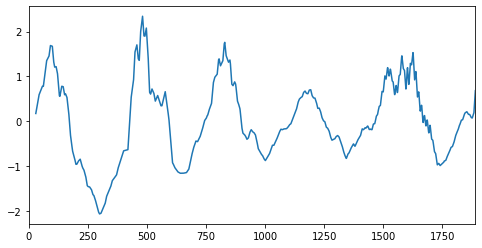

---------------------------------------------------------------



Node: dam_Zibihe, neighbors: ['dam_Xiaowan']


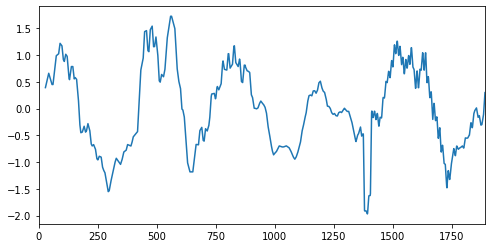

---------------------------------------------------------------



Node: dam_Gongguoqiao, neighbors: ['dam_Xiaowan']


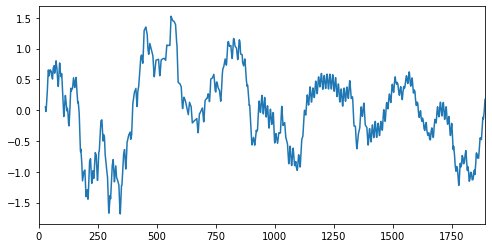

---------------------------------------------------------------



Node: dam_Xiaowan, neighbors: ['dam_Haixihai', 'dam_Zibihe', 'dam_Gongguoqiao', 'dam_Manwan']


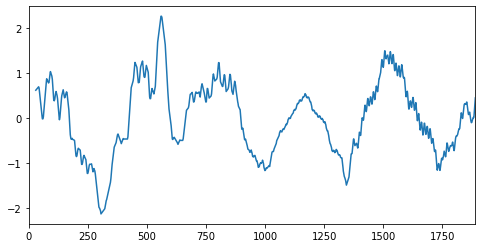

---------------------------------------------------------------



Node: dam_Manwan, neighbors: ['dam_Xiaowan', 'dam_Dachaoshan']


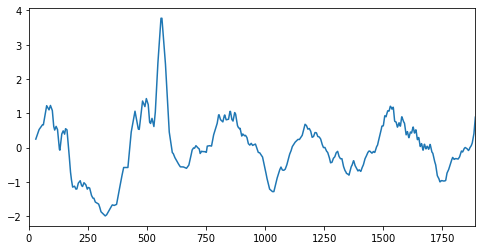

---------------------------------------------------------------



Node: dam_Dachaoshan, neighbors: ['dam_Manwan', 'dam_Nuozhadu']


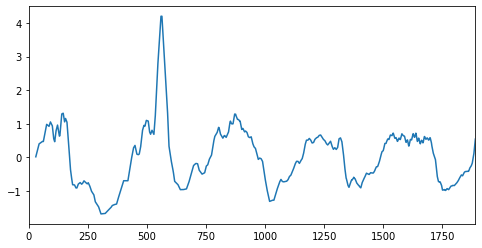

---------------------------------------------------------------



Node: dam_Nuozhadu, neighbors: ['dam_Dachaoshan', 'dam_Jinghong']


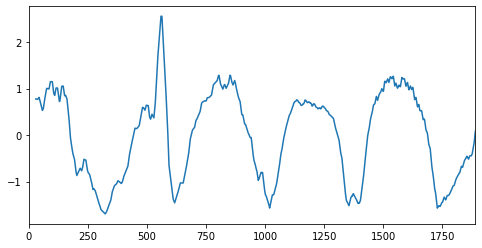

---------------------------------------------------------------



Node: dam_Jinghong, neighbors: ['dam_Nuozhadu', 'rw_239']


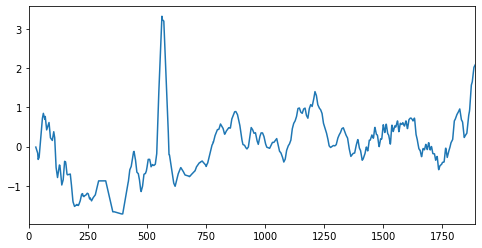

---------------------------------------------------------------



Node: dam_Nam Ngum 5, neighbors: ['dam_Nam Ngum 2']


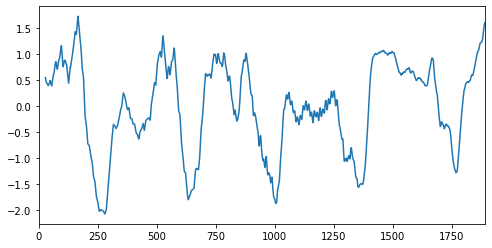

---------------------------------------------------------------



Node: dam_Nam Ngum 2, neighbors: ['dam_Nam Ngum 5', 'dam_Nam Ngum']


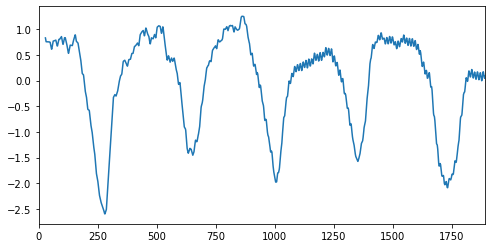

---------------------------------------------------------------



Node: dam_Nam Ngum, neighbors: ['dam_Nam Ngum 2', 'rw_242']


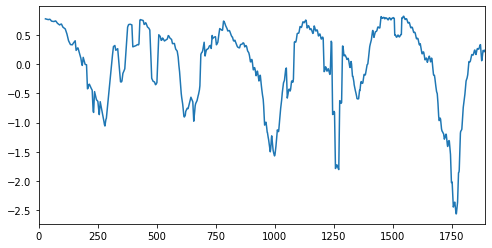

---------------------------------------------------------------



Node: dam_Nam Leuk, neighbors: ['rw_239']


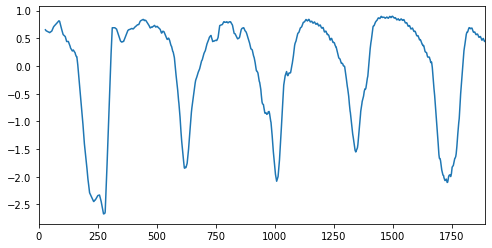

---------------------------------------------------------------



Node: dam_Nam Mang 3, neighbors: ['rw_239']


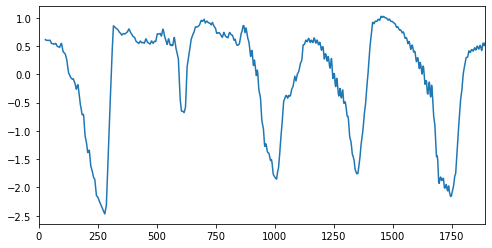

---------------------------------------------------------------



Node: rw_242, neighbors: ['dam_Nam Ngum', 'rw_239']


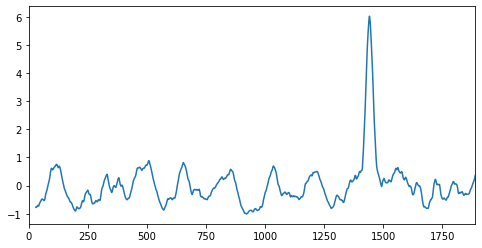

---------------------------------------------------------------



Node: dam_Nam Theun 2, neighbors: ['rw_239']


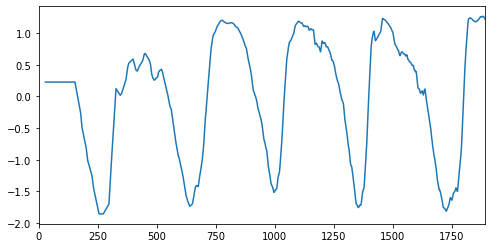

---------------------------------------------------------------



Node: rw_239, neighbors: ['dam_Jinghong', 'dam_Nam Leuk', 'dam_Nam Mang 3', 'rw_242', 'dam_Nam Theun 2', 'rw_34']


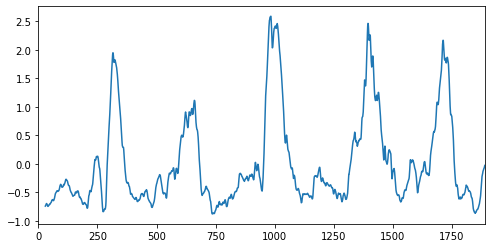

---------------------------------------------------------------



Node: dam_Nam Pung, neighbors: ['rw_34']


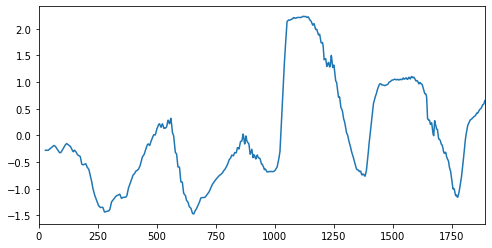

---------------------------------------------------------------



Node: dam_Ubol Ratana, neighbors: ['dam_Pak Mun', 'dam_Huai Kum']


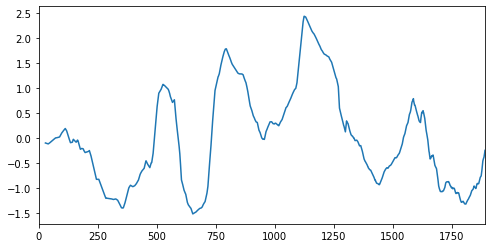

---------------------------------------------------------------



Node: dam_Lam Pao, neighbors: ['dam_Pak Mun']


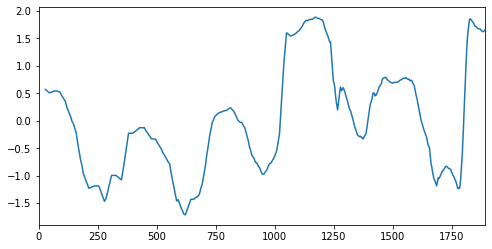

---------------------------------------------------------------



Node: dam_Chulabhorn, neighbors: ['dam_Huai Kum']


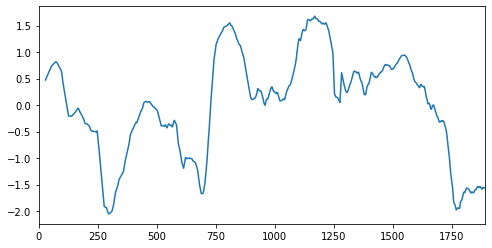

---------------------------------------------------------------



Node: dam_Huai Kum, neighbors: ['dam_Ubol Ratana', 'dam_Chulabhorn']


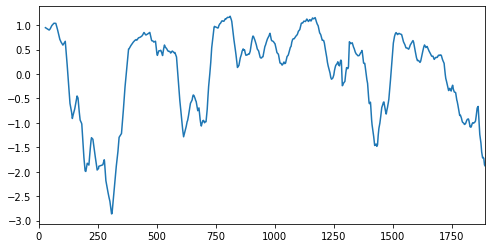

---------------------------------------------------------------



Node: dam_Xe Kaman 3, neighbors: ['dam_Xe Kaman 1']


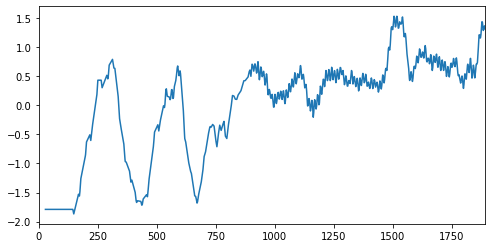

---------------------------------------------------------------



Node: dam_Pak Mun, neighbors: ['dam_Ubol Ratana', 'dam_Lam Pao', 'rw_34', 'dam_Sirindhorn', 'dam_Lamtakhong', 'dam_Lamphraphloeng', 'dam_Lamnangrong']


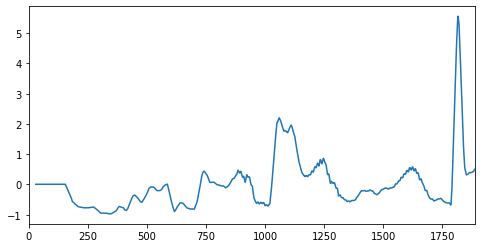

---------------------------------------------------------------



Node: dam_Sirindhorn, neighbors: ['dam_Pak Mun']


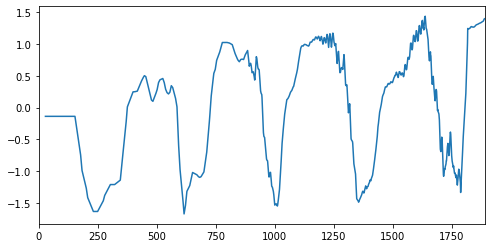

---------------------------------------------------------------



Node: dam_Houayho, neighbors: ['rw_34']


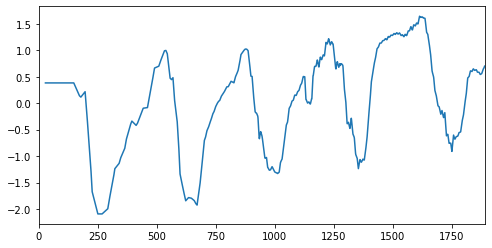

---------------------------------------------------------------



Node: dam_Xe Kaman 1, neighbors: ['dam_Xe Kaman 3', 'rw_34']


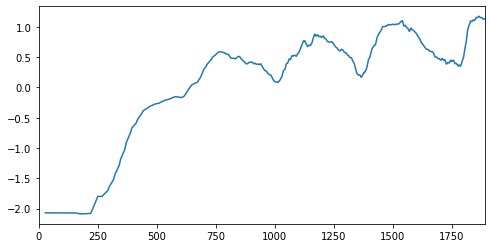

---------------------------------------------------------------



Node: dam_Lamtakhong, neighbors: ['dam_Pak Mun']


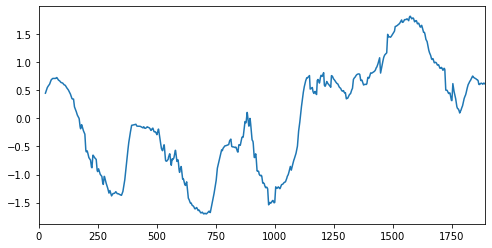

---------------------------------------------------------------



Node: dam_Lamphraphloeng, neighbors: ['dam_Pak Mun']


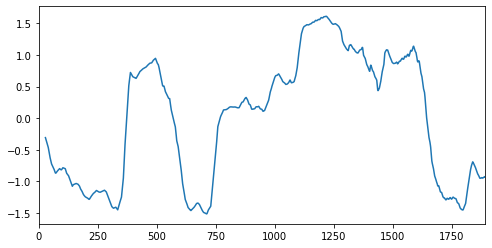

---------------------------------------------------------------



Node: dam_Plei Krong, neighbors: ['dam_Se San IV']


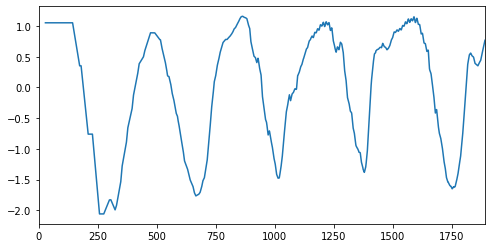

---------------------------------------------------------------



Node: dam_Lamnangrong, neighbors: ['dam_Pak Mun']


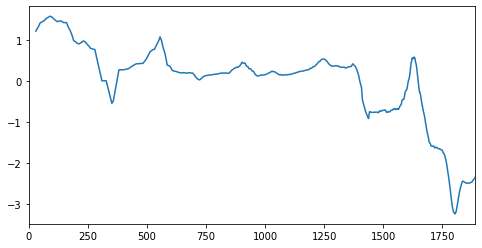

---------------------------------------------------------------



Node: dam_Se San IV, neighbors: ['dam_Plei Krong', 'dam_Lower Sesan II']


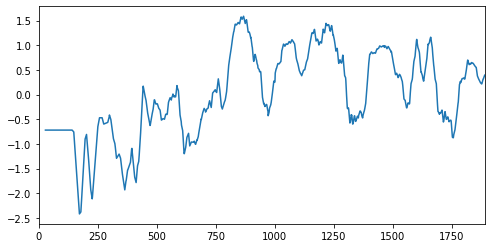

---------------------------------------------------------------



Node: dam_Lower Sesan II, neighbors: ['dam_Se San IV', 'rw_34', 'dam_Ea Soup Thuong', 'dam_Buon Kuop']


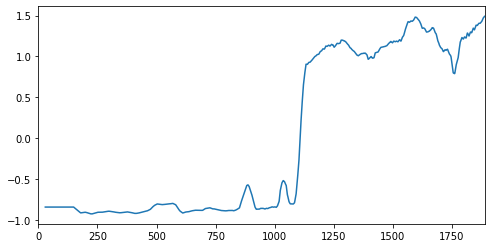

---------------------------------------------------------------



Node: dam_Ea Soup Thuong, neighbors: ['dam_Lower Sesan II']


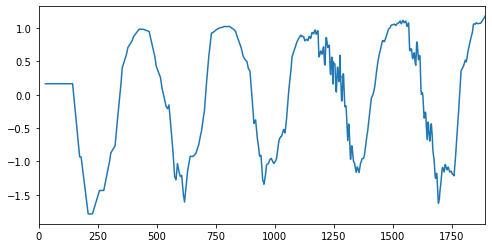

---------------------------------------------------------------



Node: dam_Krong Buk Ha, neighbors: ['dam_Buon Kuop']


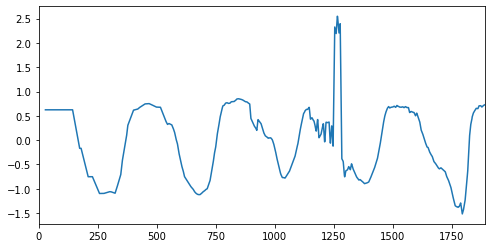

---------------------------------------------------------------



Node: dam_Buon Kuop, neighbors: ['dam_Lower Sesan II', 'dam_Krong Buk Ha']


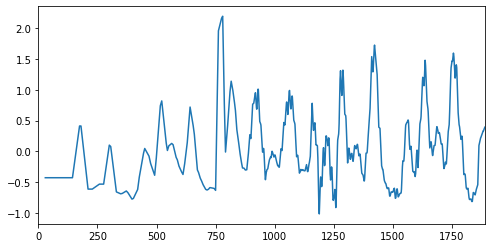

---------------------------------------------------------------



Node: rw_223, neighbors: ['rw_34']


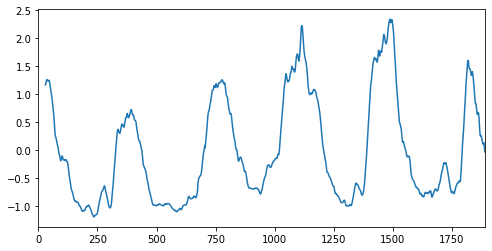

---------------------------------------------------------------



Node: rw_34, neighbors: ['rw_239', 'dam_Nam Pung', 'dam_Pak Mun', 'dam_Houayho', 'dam_Xe Kaman 1', 'dam_Lower Sesan II', 'rw_223']


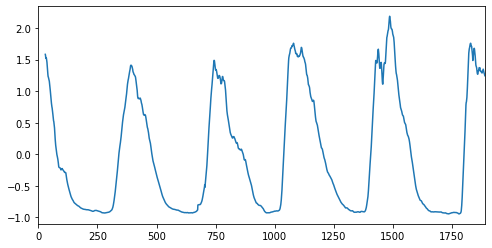

---------------------------------------------------------------



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
period = 30, future = 30
Node: dam_Haixihai, neighbors: ['dam_Xiaowan']


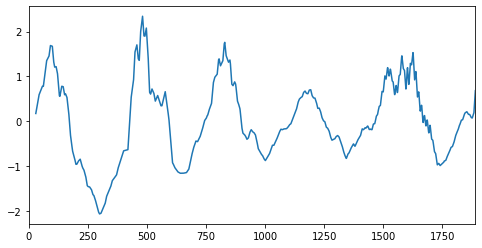

---------------------------------------------------------------



Node: dam_Zibihe, neighbors: ['dam_Xiaowan']


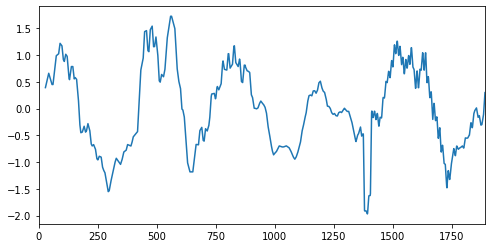

---------------------------------------------------------------



Node: dam_Gongguoqiao, neighbors: ['dam_Xiaowan']


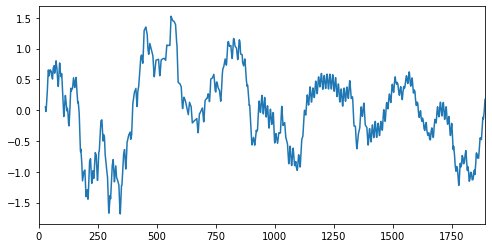

---------------------------------------------------------------



Node: dam_Xiaowan, neighbors: ['dam_Haixihai', 'dam_Zibihe', 'dam_Gongguoqiao', 'dam_Manwan']


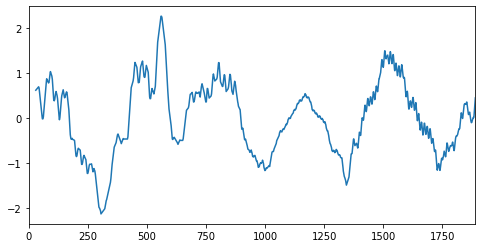

---------------------------------------------------------------



Node: dam_Manwan, neighbors: ['dam_Xiaowan', 'dam_Dachaoshan']


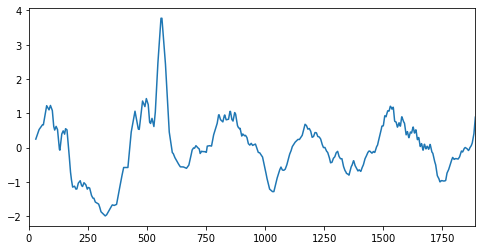

---------------------------------------------------------------



Node: dam_Dachaoshan, neighbors: ['dam_Manwan', 'dam_Nuozhadu']


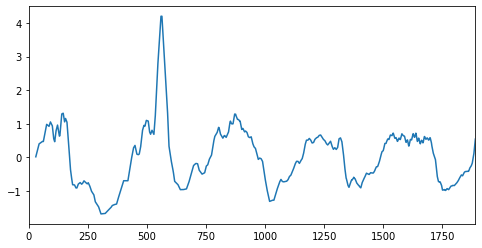

---------------------------------------------------------------



Node: dam_Nuozhadu, neighbors: ['dam_Dachaoshan', 'dam_Jinghong']


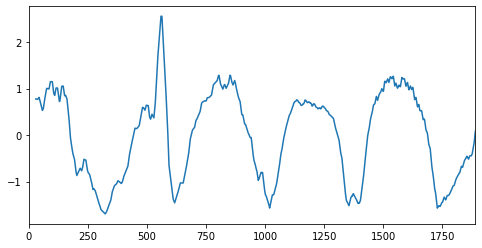

---------------------------------------------------------------



Node: dam_Jinghong, neighbors: ['dam_Nuozhadu', 'rw_239']


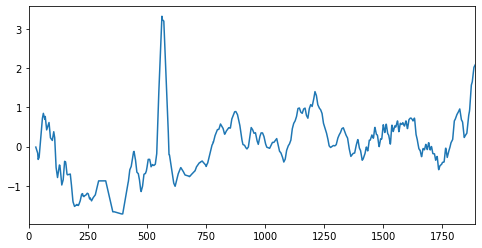

---------------------------------------------------------------



Node: dam_Nam Ngum 5, neighbors: ['dam_Nam Ngum 2']


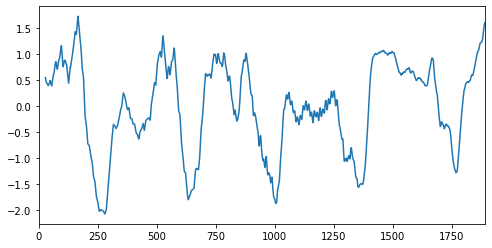

---------------------------------------------------------------



Node: dam_Nam Ngum 2, neighbors: ['dam_Nam Ngum 5', 'dam_Nam Ngum']


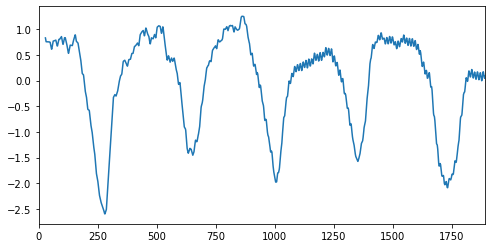

---------------------------------------------------------------



Node: dam_Nam Ngum, neighbors: ['dam_Nam Ngum 2', 'rw_242']


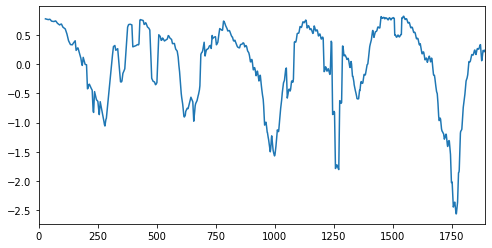

---------------------------------------------------------------



Node: dam_Nam Leuk, neighbors: ['rw_239']


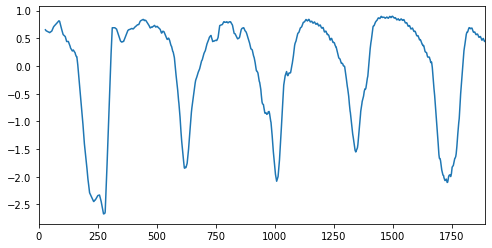

---------------------------------------------------------------



Node: dam_Nam Mang 3, neighbors: ['rw_239']


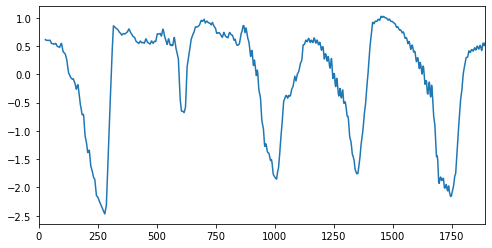

---------------------------------------------------------------



Node: rw_242, neighbors: ['dam_Nam Ngum', 'rw_239']


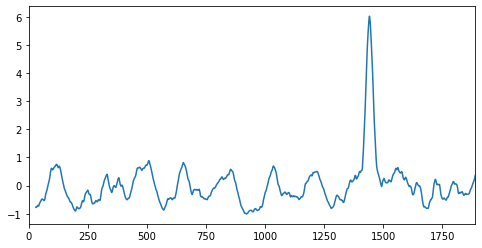

---------------------------------------------------------------



Node: dam_Nam Theun 2, neighbors: ['rw_239']


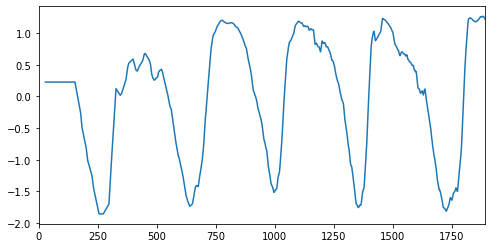

---------------------------------------------------------------



Node: rw_239, neighbors: ['dam_Jinghong', 'dam_Nam Leuk', 'dam_Nam Mang 3', 'rw_242', 'dam_Nam Theun 2', 'rw_34']


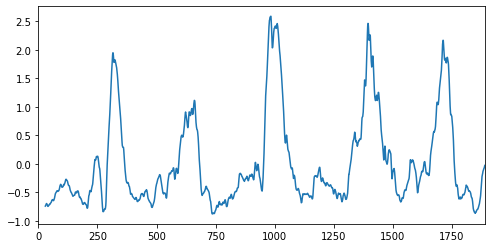

---------------------------------------------------------------



Node: dam_Nam Pung, neighbors: ['rw_34']


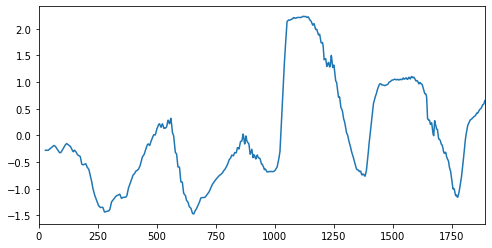

---------------------------------------------------------------



Node: dam_Ubol Ratana, neighbors: ['dam_Pak Mun', 'dam_Huai Kum']


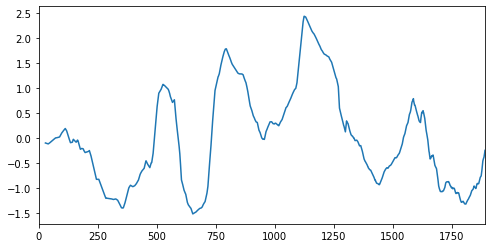

---------------------------------------------------------------



Node: dam_Lam Pao, neighbors: ['dam_Pak Mun']


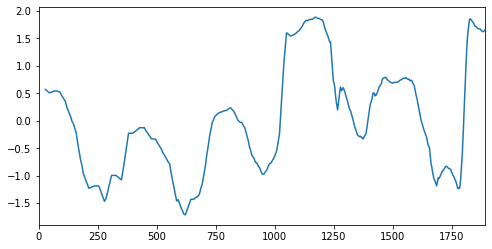

---------------------------------------------------------------



Node: dam_Chulabhorn, neighbors: ['dam_Huai Kum']


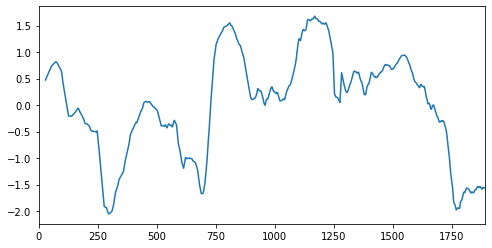

---------------------------------------------------------------



Node: dam_Huai Kum, neighbors: ['dam_Ubol Ratana', 'dam_Chulabhorn']


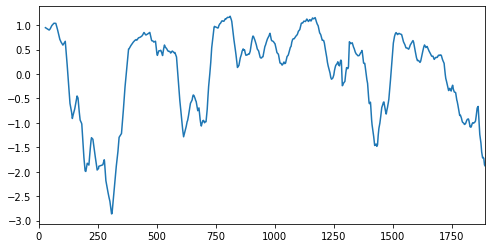

---------------------------------------------------------------



Node: dam_Xe Kaman 3, neighbors: ['dam_Xe Kaman 1']


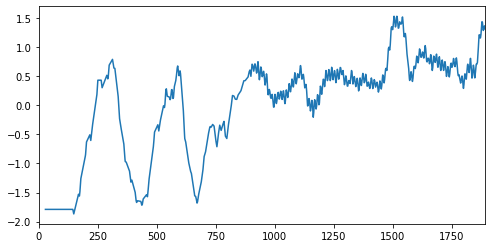

---------------------------------------------------------------



Node: dam_Pak Mun, neighbors: ['dam_Ubol Ratana', 'dam_Lam Pao', 'rw_34', 'dam_Sirindhorn', 'dam_Lamtakhong', 'dam_Lamphraphloeng', 'dam_Lamnangrong']


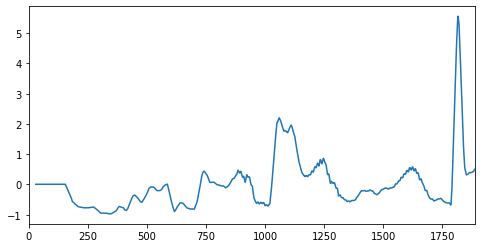

---------------------------------------------------------------



Node: dam_Sirindhorn, neighbors: ['dam_Pak Mun']


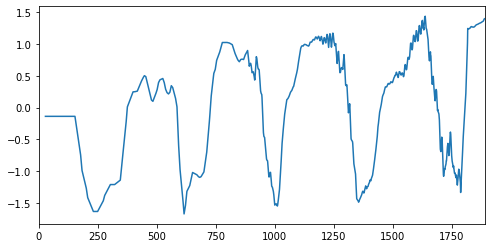

---------------------------------------------------------------



Node: dam_Houayho, neighbors: ['rw_34']


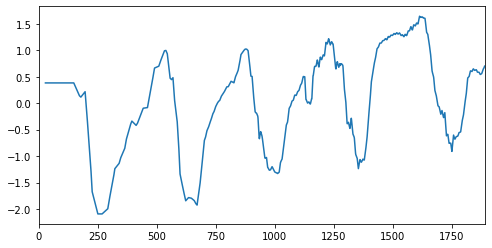

---------------------------------------------------------------



Node: dam_Xe Kaman 1, neighbors: ['dam_Xe Kaman 3', 'rw_34']


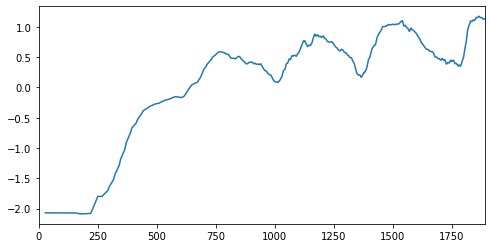

---------------------------------------------------------------



Node: dam_Lamtakhong, neighbors: ['dam_Pak Mun']


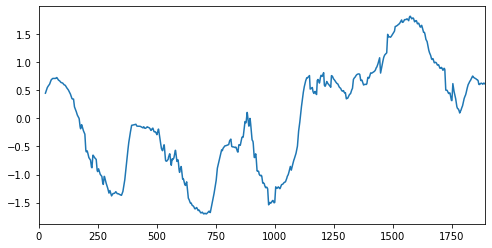

---------------------------------------------------------------



Node: dam_Lamphraphloeng, neighbors: ['dam_Pak Mun']


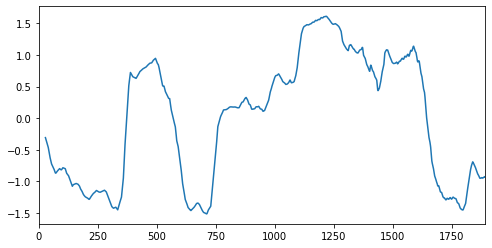

---------------------------------------------------------------



Node: dam_Plei Krong, neighbors: ['dam_Se San IV']


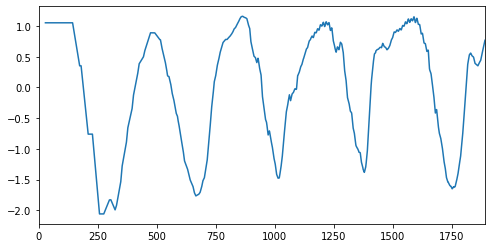

---------------------------------------------------------------



Node: dam_Lamnangrong, neighbors: ['dam_Pak Mun']


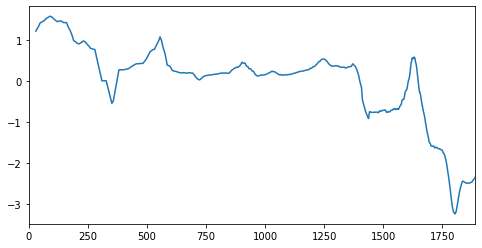

---------------------------------------------------------------



Node: dam_Se San IV, neighbors: ['dam_Plei Krong', 'dam_Lower Sesan II']


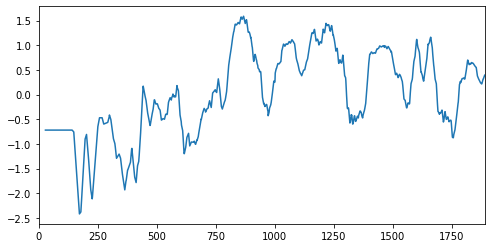

---------------------------------------------------------------



Node: dam_Lower Sesan II, neighbors: ['dam_Se San IV', 'rw_34', 'dam_Ea Soup Thuong', 'dam_Buon Kuop']


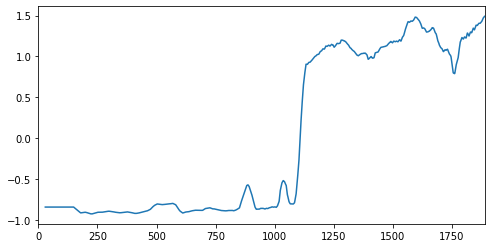

---------------------------------------------------------------



Node: dam_Ea Soup Thuong, neighbors: ['dam_Lower Sesan II']


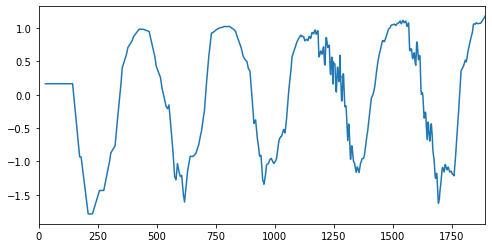

---------------------------------------------------------------



Node: dam_Krong Buk Ha, neighbors: ['dam_Buon Kuop']


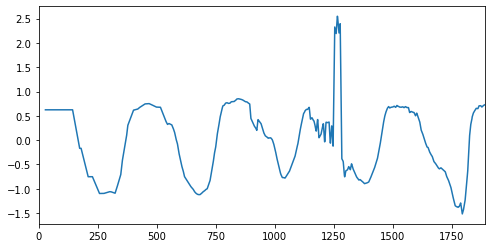

---------------------------------------------------------------



Node: dam_Buon Kuop, neighbors: ['dam_Lower Sesan II', 'dam_Krong Buk Ha']


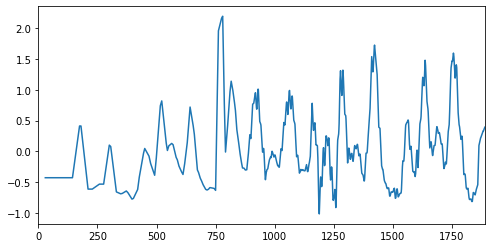

---------------------------------------------------------------



Node: rw_223, neighbors: ['rw_34']


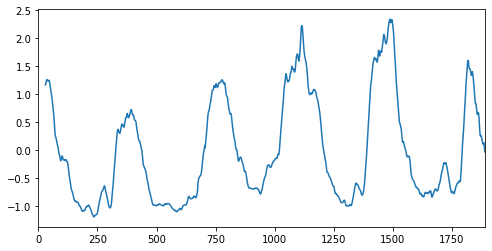

---------------------------------------------------------------



Node: rw_34, neighbors: ['rw_239', 'dam_Nam Pung', 'dam_Pak Mun', 'dam_Houayho', 'dam_Xe Kaman 1', 'dam_Lower Sesan II', 'rw_223']


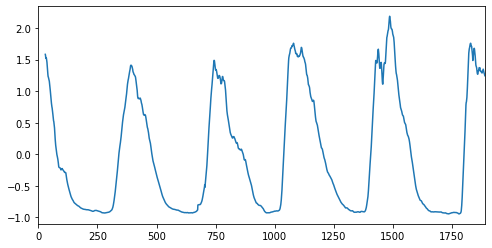

---------------------------------------------------------------


In [27]:
for period in [15, 30]:
    for future in [1, 10, 30]:
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
        print(f'period = {period}, future = {future}')
        for node in river_network.nodes:
            adj = river_network.adj[node]
            adj = list(map(lambda x: river_network.nodes[x]['attr']['name'], adj.keys()))
            node = river_network.nodes.get(node)['attr']['name']
            print(f'Node: {node}, neighbors: {adj}')
            plt.figure(figsize = (8, 4))
            df_transformed[node].rolling(30).mean().plot(use_index = True)
            plt.show()
            print('---------------------------------------------------------------')
            res = pd.concat([survey(df_transformed, node, [node], regressors, period, future),
                             survey(df_transformed, node, [node] + adj, regressors, period, future),
                             survey(df_transformed, node, adj, regressors, period, future)
                            ], axis = 0)
            res.index = ['Self data', 'Neighborhood data', 'Exclusive data']
            display(res.style.background_gradient(cmap='coolwarm', axis = None))
            print('===============================================================', end = '\n\n')